In [31]:
import numpy as np
import pandas as pd

import json
import csv

import datetime
import matplotlib.pyplot as plt

from statsmodels.regression.linear_model import RegressionResults
import pytz
import statsmodels.api as sm
from statsmodels.formula.api import ols


import itertools
import json
import pickle
import string
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from nltk.corpus import stopwords

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings

import nltk
nltk.download('stopwords')



# http://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html
# http://connor-johnson.com/2014/02/18/linear-regression-with-python/

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nnguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
filenames = ['ECE219_tweet_data/tweets_#gohawks.txt',
            'ECE219_tweet_data/tweets_#gopatriots.txt',
            'ECE219_tweet_data/tweets_#nfl.txt',
            'ECE219_tweet_data/tweets_#patriots.txt',
            'ECE219_tweet_data/tweets_#sb49.txt',
            'ECE219_tweet_data/tweets_#superbowl.txt'
            ]

output_filenames = ['Q1_2#gohawks.txt',
                    'Q1_2#gopatriots.txt',
                   'Q1_2#nfl.txt',
                   'Q1_2#patriots.txt',
                   'Q1_2#sb49.txt',
                   'Q1_2#superbowl.txt']

for i in range(len(filenames)):
    pst_tz = pytz.timezone('US/Pacific')
    
    with open(filenames[i], 'r') as reader:
        headers = [
                   'citation_date_raw',
                   'author_nick_names',
                   'tweets',
                   'retweets',
                   'followers',
                   'followers_max'
                  ]
        with open(output_filenames[i], 'w') as writer:
            csv_writer = csv.writer(writer, lineterminator='\n')
            csv_writer.writerow(headers)
            for line in reader:
                data = json.loads(line)
                response =  [
                            data['citation_date'],
                            data['author']['nick'],
                            1, # there is one tweet at a time..
                            data['metrics']['citations']['total'], #retweets
                            data['author']['followers'], #followers
                            data['author']['followers'], #followers
                             ]
                csv_writer.writerow(response)


In [15]:
def parse_date_pst(df):
    utc_tz = pytz.UTC
    pst_tz = pytz.timezone('America/Los_Angeles')
    df['citation_date'] = pd.to_datetime(df['citation_date_raw'], unit='s')
    df['citation_date_pst'] = pd.to_datetime(df['citation_date_raw'], unit='s').apply(lambda x: x.tz_localize(utc_tz).astimezone(pst_tz))
    df['date'] = df['citation_date_pst'].apply(lambda x: x.strftime('%Y%m%d'))
    df['hour'] = df['citation_date_pst'].apply(lambda x: x.hour)
    df['minute'] = df['citation_date_pst'].apply(lambda x: x.minute)
    
    
def get_basic_statistics(dataframe):
    max = dataframe.max()
    min = dataframe.min()
    avg_tweets_per_hour = dataframe['tweets'].sum() / ((max['citation_date_pst'] - min['citation_date_pst']).total_seconds() / 60 / 60)
    print('Average tweets per hour:',avg_tweets_per_hour)
    
    avg_followers_posting_tweets = dataframe['followers'].sum() / dataframe['tweets'].sum()
    print('Average number of users posting tweets per tweet:', avg_followers_posting_tweets)
    
    avg_retweet_per_tweet = dataframe['retweets'].sum() / dataframe['tweets'].sum()
    print('Average number of retweet per tweet:', avg_retweet_per_tweet)
    
       
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())    
    
    
    
def train_ols(df_agg, title: 'Generic stuff...'):
    print('=============================',title,'======================================')

    #train ols here
    model = ols("future_tweets ~ tweets + hour + retweets + followers + followers_max", data=df_agg).fit()
    print(model.summary())
    print('==============================MSE==============================================')
    print("MSE_residual:",model.mse_resid)
    
    fig, ax = plt.subplots()
    fig = sm.graphics.plot_fit(model, "hour", ax=ax)
    plt.show()
    
    fig1, ax1 = plt.subplots()
    fig1 = sm.graphics.plot_fit(model, "tweets", ax=ax1)
    plt.show()
    
    fig2, ax2 = plt.subplots()
    fig2 = sm.graphics.plot_fit(model, "retweets", ax=ax2)
    plt.show()
    
    fig3, ax3 = plt.subplots()
    fig3 = sm.graphics.plot_fit(model, "followers", ax=ax3)
    plt.show()
    
    fig4, ax4 = plt.subplots()
    fig4 = sm.graphics.plot_fit(model, "followers_max", ax=ax4)
    plt.show()
    
    
#     fig = plt.figure(figsize=(12,8))
#     fig = sm.graphics.plot_partregress_grid(model, fig=fig)
#     plt.show()
    
#     hour_exog = plt.figure(figsize=(12,8))
#     hour_exog = sm.graphics.plot_regress_exog(model, "hour", fig=hour_exog)
#     plt.show()
    
#     retweets_exog = plt.figure(figsize=(12,8))
#     retweets_exog = sm.graphics.plot_regress_exog(model, "retweets", fig=retweets_exog)
#     plt.show()
    
#     followers_exog = plt.figure(figsize=(12,8))
#     followers_exog = sm.graphics.plot_regress_exog(model, "followers", fig=followers_exog)
#     plt.show()
    
#     followers_max_exog = plt.figure(figsize=(12,8))
#     followers_max_exog = sm.graphics.plot_regress_exog(model, "followers_max", fig=followers_max_exog)
#     plt.show()
    
    return model

    
    

In [6]:
# Some global variables to help the helper functions
table = str.maketrans({key: None for key in string.punctuation})
english_stopwords = stopwords.words('english')
for n,stopword in enumerate(english_stopwords):
    english_stopwords[n] = stopword.translate(table).lower()
english_stopwords = set(english_stopwords)

def clean_tweet(tweet):
    # Split by white space
    words = tweet.split()
    # Remove anything with "@", "t.co","&"
    for n,word in enumerate(words):
        if "@" in word or "t.co" in word:# or "&" in word:
            words[n] = ""
        else:
            # Remove punctuation and lowercase
            words[n] = word.translate(table).lower()
            # Check if clean word in clean stopword set
            if words[n] in english_stopwords or not words[n].isalnum():
                words[n] = ""
            
    clean_tweet = " ".join(filter(None,words))
    return clean_tweet

def print_metrics(truth,pred):
    print('Accuracy: ' + str(metrics.accuracy_score(truth, pred)))
    print('Precision: ' + str(metrics.precision_score(truth, pred)))
    print('Recall: ' + str(metrics.recall_score(truth, pred)))
    print('F-1 Score: ' + str(metrics.f1_score(truth, pred)))
    
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          classes = ['Massachussetts', 'Washington']
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def roc_plotter(model, data, labels, clfType):
    if clfType == "LogisticRegression":
        scores = model.decision_function(data)
    elif clfType in ["RandomForest","NaiveBayes"]:
        scores = model.predict_log_proba(data)[:,1]
    else:
        print("Invalid clfType.")
        return
    fpr, tpr, thresholds = roc_curve(labels,scores)
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [7]:
# QUESTION 1: Report the following statistics for each hashtag:
#  Average number of tweets per hour
#  Average number of followers of users posting the tweets per tweet (to make it simple, we
# average over the number of tweets; if a users posted twice, we count the user and the user's
# followers twice as well)
#  Average number of retweets per tweet

In [8]:
gohawks = pd.read_csv('Q1_2#gohawks.txt',delimiter=',')
gopatriots = pd.read_csv('Q1_2#gopatriots.txt',delimiter=',')
nfl = pd.read_csv('Q1_2#nfl.txt',delimiter=',')
patriots = pd.read_csv('Q1_2#patriots.txt',delimiter=',')
sb49 = pd.read_csv('Q1_2#sb49.txt',delimiter=',')
superbowl = pd.read_csv('Q1_2#superbowl.txt',delimiter=',')

In [9]:
# parse date for use down below.

parse_date_pst(gohawks)
parse_date_pst(gopatriots)
parse_date_pst(nfl)
parse_date_pst(patriots)
parse_date_pst(sb49)
parse_date_pst(superbowl)

In [10]:
# go hawks
print('GoHawks')
get_basic_statistics(gohawks)

#go patriots
print('GoPatriots')
get_basic_statistics(gopatriots)

print('NFL')
get_basic_statistics(nfl)

print('Patriots')
get_basic_statistics(patriots)

print('Sb49')
get_basic_statistics(sb49)

print('Superbowl')
get_basic_statistics(superbowl)

GoHawks
Average tweets per hour: 292.4878506217368
Average number of users posting tweets per tweet: 2217.9237355281984
Average number of retweet per tweet: 2.0132093991319877
GoPatriots
Average tweets per hour: 40.95469800606194
Average number of users posting tweets per tweet: 1427.2526051635405
Average number of retweet per tweet: 1.4081919101697078
NFL
Average tweets per hour: 397.0213901819841
Average number of users posting tweets per tweet: 4662.37544523693
Average number of retweet per tweet: 1.5344602655543254
Patriots
Average tweets per hour: 750.89426460689
Average number of users posting tweets per tweet: 3280.4635616550277
Average number of retweet per tweet: 1.7852871288476946
Sb49
Average tweets per hour: 1276.857059868047
Average number of users posting tweets per tweet: 10374.160292019487
Average number of retweet per tweet: 2.52713444111402
Superbowl
Average tweets per hour: 2072.1184017040796
Average number of users posting tweets per tweet: 8814.96799424623
Average 

In [11]:
# QUESTION 2: Plot "number of tweets in hour" over time for #SuperBowl and #NFL (a histogram
# with 1-hour bins). The tweets are stored in separate files for different hashtags and files are named
# as tweet [#hashtag].txt.

In [12]:
max = nfl.max()
min = nfl.min()
nfl['time_hour'] = nfl['citation_date'].apply(lambda x: round((x - min['citation_date']).total_seconds()/60/60))
nfl_time_hour = nfl.groupby('time_hour').sum()

nfl_x = list(nfl_time_hour.index)
nfl_y = list(nfl_time_hour.tweets)


In [13]:
print('=======min========')
print(min)
print('=======max========')
print(max)

=======min========
citation_date_raw                   1421222404
author_nick_names                      007mmi6
tweets                                       1
retweets                                     1
followers                                    0
followers_max                                0
citation_date              2015-01-14 08:00:04
citation_date_pst    2015-01-14 00:00:04-08:00
date                                  20150114
hour                                         0
minute                                       0
dtype: object
=======max========
citation_date_raw                   1423335336
author_nick_names                   zzzzuuuppp
tweets                                       1
retweets                                  3856
followers                          9.62388e+06
followers_max                      9.62388e+06
citation_date              2015-02-07 18:55:36
citation_date_pst    2015-02-07 10:55:36-08:00
date                                  20150207
hour    

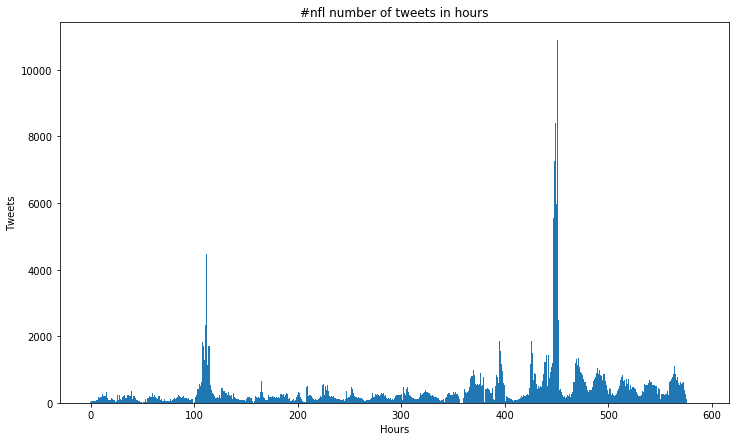

In [14]:
plt.figure(figsize=(12,7))
plt.bar(nfl_x, nfl_y, width=nfl_x[1]-nfl_x[0])
plt.xlabel('Hours')
plt.ylabel('Tweets')
plt.title('#nfl number of tweets in hours')
plt.show()

In [15]:
max = superbowl.max()
min = superbowl.min()
superbowl['time_hour'] = superbowl['citation_date'].apply(lambda x: round((x - min['citation_date']).total_seconds()/60/60))
superbowl_time_hour = superbowl.groupby('time_hour').sum()
superbowl_time_hour_x = list(superbowl_time_hour.index)
superbowl_time_hour_y = list(superbowl_time_hour.tweets)

In [16]:
print('=======min========')
print(min)
print('=======max========')
print(max)

=======min========
citation_date_raw             1421223187
tweets                                 1
retweets                               1
followers                              0
followers_max                          0
citation_date        2015-01-14 08:13:07
citation_date_pst    2015-01-14 08:13:07
date                            20150114
hour                                   0
minute                                 0
dtype: object
=======max========
citation_date_raw             1423332008
tweets                                 1
retweets                           17775
followers                    4.09023e+07
followers_max                4.09023e+07
citation_date        2015-02-07 18:00:08
citation_date_pst    2015-02-07 18:00:08
date                            20150207
hour                                  23
minute                                59
dtype: object


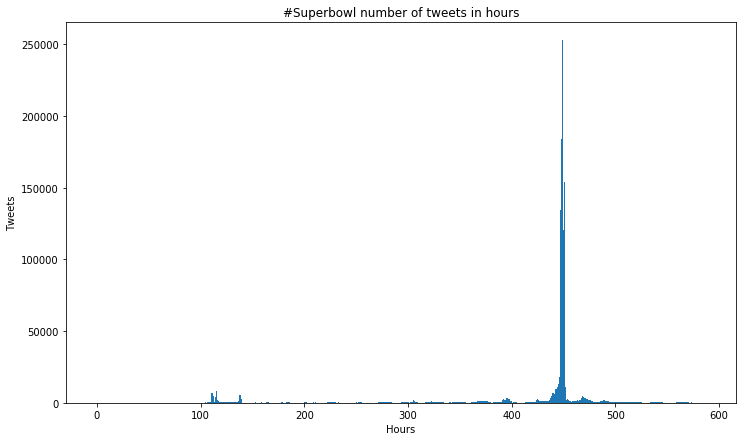

In [17]:
plt.figure(figsize=(12,7))
plt.bar(superbowl_time_hour_x, superbowl_time_hour_y, width=superbowl_time_hour_x[1]-superbowl_time_hour_x[0])
plt.xlabel('Hours')
plt.ylabel('Tweets')
plt.title('#Superbowl number of tweets in hours')
plt.show()

In [18]:
max = gohawks.max()
min = gohawks.min()
gohawks['time_hour'] = gohawks['citation_date'].apply(lambda x: round((x - min['citation_date']).total_seconds()/60/60))
gohawks_time_hour = gohawks.groupby('time_hour').sum()

gohawks_x = list(gohawks_time_hour.index)
gohawks_y = list(gohawks_time_hour.tweets)


In [19]:
print('=======min========')
print(min)
print('=======max========')
print(max)

=======min========
citation_date_raw                   1421222681
author_nick_names                      007mmi6
tweets                                       1
retweets                                     1
followers                                    0
followers_max                                0
citation_date              2015-01-14 08:04:41
citation_date_pst    2015-01-14 00:04:41-08:00
date                                  20150114
hour                                         0
minute                                       0
dtype: object
=======max========
citation_date_raw                   1423304269
author_nick_names                     zzz_news
tweets                                       1
retweets                                 11516
followers                           4.7219e+06
followers_max                       4.7219e+06
citation_date              2015-02-07 10:17:49
citation_date_pst    2015-02-07 02:17:49-08:00
date                                  20150207
hour    

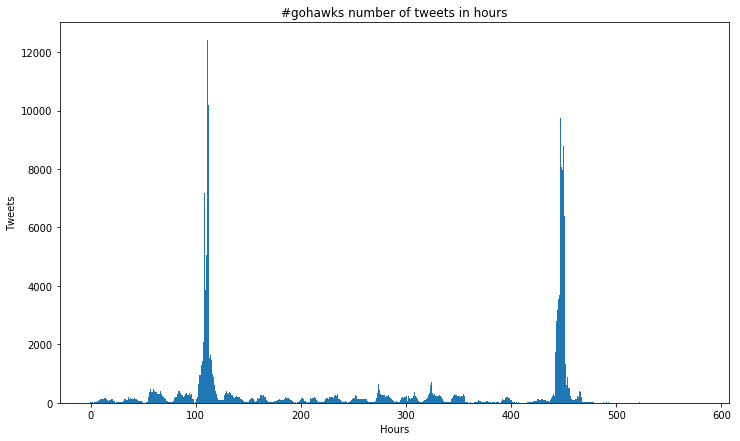

In [20]:
plt.figure(figsize=(12,7))
plt.bar(gohawks_x, gohawks_y, width=gohawks_x[1]-gohawks_x[0])
plt.xlabel('Hours')
plt.ylabel('Tweets')
plt.title('#gohawks number of tweets in hours')
plt.show()

In [21]:
max = gopatriots.max()
min = gopatriots.min()
gopatriots['time_hour'] = gopatriots['citation_date'].apply(lambda x: round((x - min['citation_date']).total_seconds()/60/60))
gopatriots_time_hour = gopatriots.groupby('time_hour').sum()

gopatriots_x = list(gopatriots_time_hour.index)
gopatriots_y = list(gopatriots_time_hour.tweets)


In [22]:
print('=======min========')
print(min)
print('=======max========')
print(max)

=======min========
citation_date_raw                   1421229011
author_nick_names              007richardadams
tweets                                       1
retweets                                     1
followers                                    0
followers_max                                0
citation_date              2015-01-14 09:50:11
citation_date_pst    2015-01-14 01:50:11-08:00
date                                  20150114
hour                                         0
minute                                       0
dtype: object
=======max========
citation_date_raw                   1423295675
author_nick_names                  zzzzzxx1231
tweets                                       1
retweets                                   379
followers                          3.07701e+06
followers_max                      3.07701e+06
citation_date              2015-02-07 07:54:35
citation_date_pst    2015-02-06 23:54:35-08:00
date                                  20150206
hour    

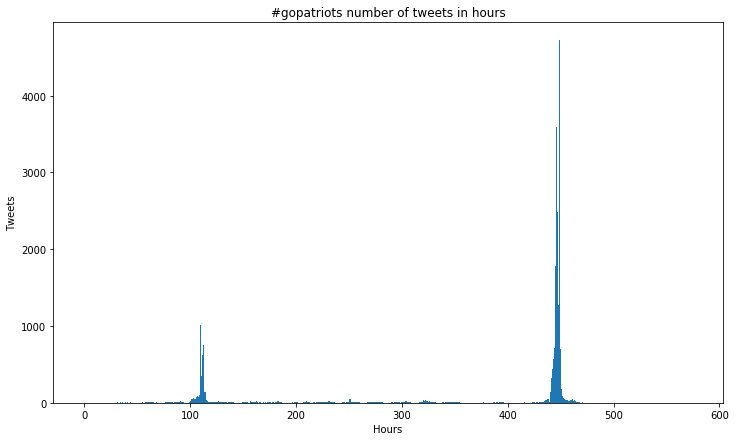

In [23]:
plt.figure(figsize=(12,7))
plt.bar(gopatriots_x, gopatriots_y, width=gopatriots_x[1]-gopatriots_x[0])
plt.xlabel('Hours')
plt.ylabel('Tweets')
plt.title('#gopatriots number of tweets in hours')
plt.show()

In [24]:
len(gohawks.author_nick_names.unique())

72401

In [25]:
len(gopatriots.author_nick_names.unique())

16558

In [26]:
# QUESTION 3: For each of your models, report your model's Mean Squared Error (MSE) and
# R-squared measure. Also, analyse the significance of each feature using the t-test and p-value. You
# may use the OLS in the libarary statsmodels in Python.



============================= Gohawks aggregated ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     102.3
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           1.10e-76
Time:                        13:07:59   Log-Likelihood:                -4663.7
No. Observations:                 569   AIC:                             9339.
Df Residuals:                     563   BIC:                             9365.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

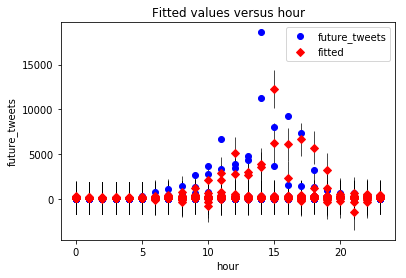

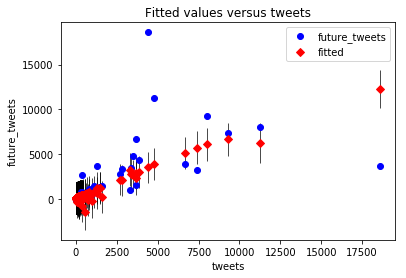

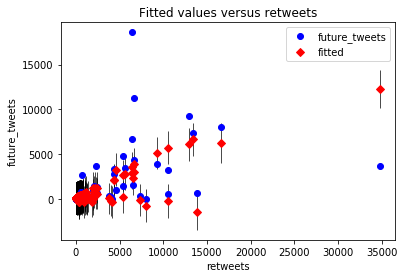

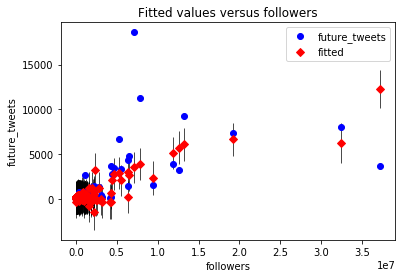

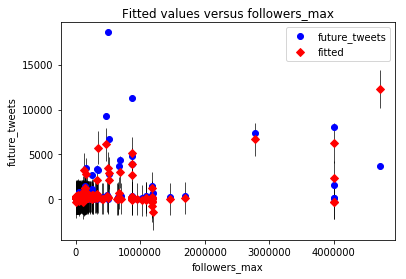

In [27]:
gohawks_agg = gohawks.groupby(pd.Grouper(key='citation_date_pst',freq='60Min')).agg({
    'hour':'max',
    'tweets':'sum',
    'retweets':'sum',
    'followers':'sum',
    'followers_max':'max'
})
gohawks_agg['future_tweets'] = gohawks_agg['tweets']
gohawks_agg.future_tweets = gohawks_agg.future_tweets.shift(-1)
gohawks_model = train_ols(gohawks_agg, 'Gohawks aggregated')

============================= GoPatriots aggregated ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           1.33e-90
Time:                        13:08:04   Log-Likelihood:                -2932.2
No. Observations:                 440   AIC:                             5876.
Df Residuals:                     434   BIC:                             5901.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

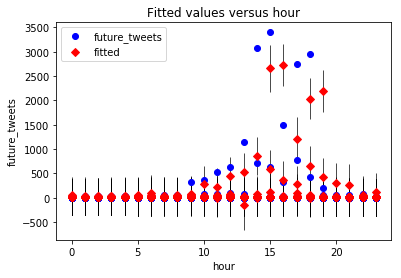

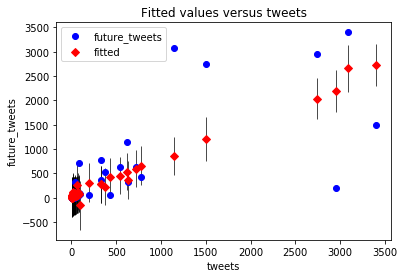

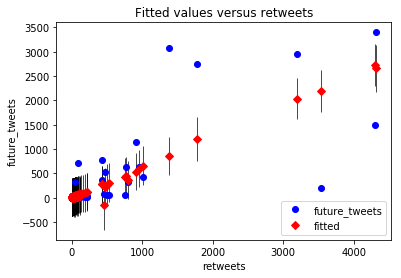

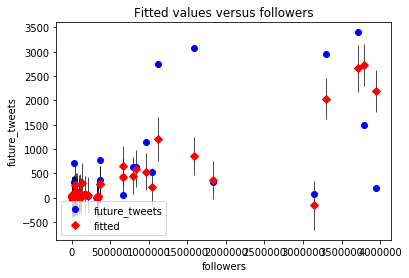

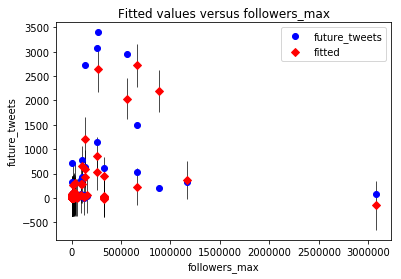

In [28]:
gopatriots_agg = gopatriots.groupby(pd.Grouper(key='citation_date_pst',freq='60Min')).agg({
    'hour':'max',
    'tweets':'sum',
    'retweets':'sum',
    'followers':'sum',
    'followers_max':'max'
})
gopatriots_agg['future_tweets'] = gopatriots_agg['tweets']
gopatriots_agg.future_tweets = gopatriots_agg.future_tweets.shift(-1)
gopatriots_model = train_ols(gopatriots_agg, 'GoPatriots aggregated')

============================= nlf aggregated ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sun, 10 Jun 2018   Prob (F-statistic):          3.57e-103
Time:                        13:08:06   Log-Likelihood:                -4467.0
No. Observations:                 582   AIC:                             8946.
Df Residuals:                     576   BIC:                             8972.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

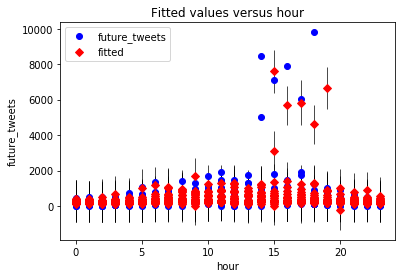

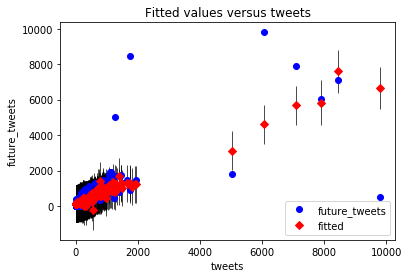

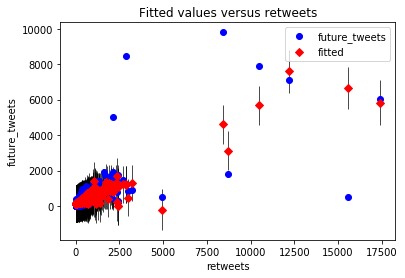

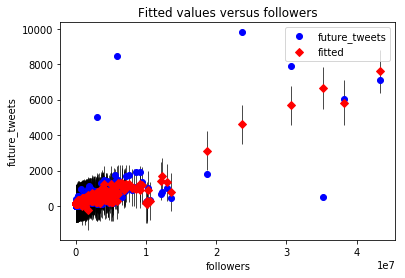

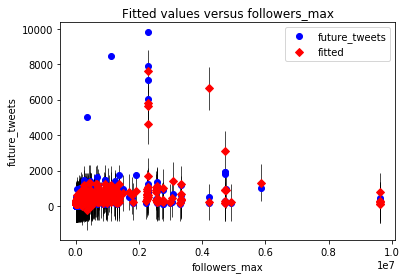

In [29]:
nfl_agg = nfl.groupby(pd.Grouper(key='citation_date_pst',freq='60Min')).agg({
    'hour':'max',
    'tweets':'sum',
    'retweets':'sum',
    'followers':'sum',
    'followers_max':'max'
})
nfl_agg['future_tweets'] = nfl_agg['tweets']
nfl_agg.future_tweets = nfl_agg.future_tweets.shift(-1)
nfl_model = train_ols(nfl_agg, 'nlf aggregated')

============================= patriots aggregated ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 10 Jun 2018   Prob (F-statistic):          1.91e-136
Time:                        13:08:07   Log-Likelihood:                -5361.4
No. Observations:                 586   AIC:                         1.073e+04
Df Residuals:                     580   BIC:                         1.076e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

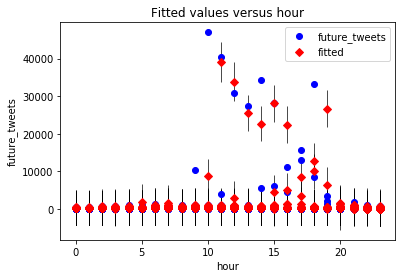

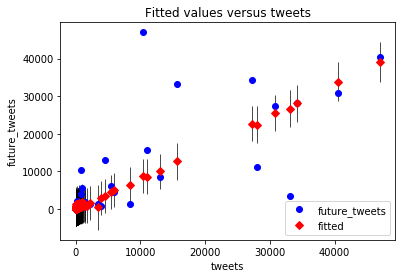

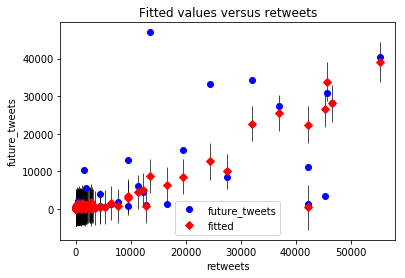

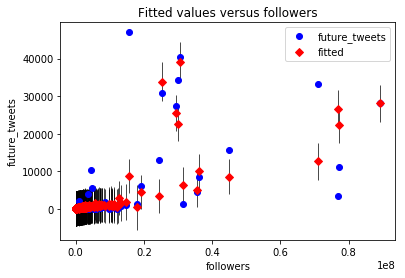

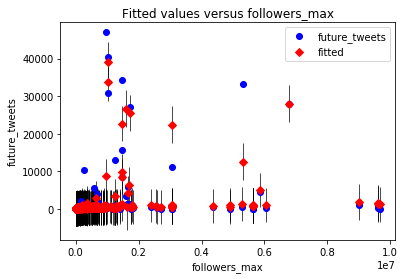

In [30]:
patriots_agg = patriots.groupby(pd.Grouper(key='citation_date_pst',freq='60Min')).agg({
    'hour':'max',
    'tweets':'sum',
    'retweets':'sum',
    'followers':'sum',
    'followers_max':'max'
})
patriots_agg['future_tweets'] = patriots_agg['tweets']
patriots_agg.future_tweets = patriots_agg.future_tweets.shift(-1)
patriots_model = train_ols(patriots_agg, 'patriots aggregated')

============================= sb49 aggregated ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     435.6
Date:                Sun, 10 Jun 2018   Prob (F-statistic):          4.54e-185
Time:                        13:08:08   Log-Likelihood:                -5231.3
No. Observations:                 536   AIC:                         1.047e+04
Df Residuals:                     530   BIC:                         1.050e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

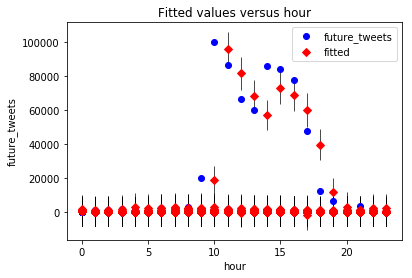

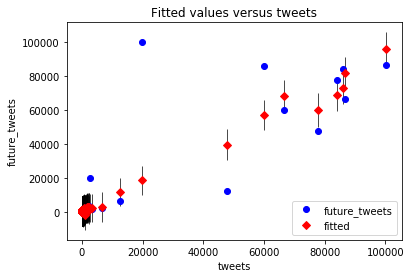

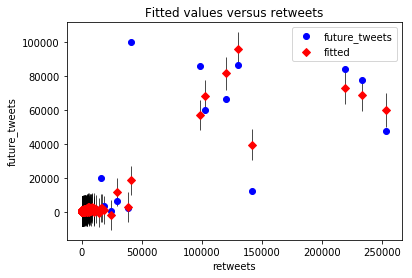

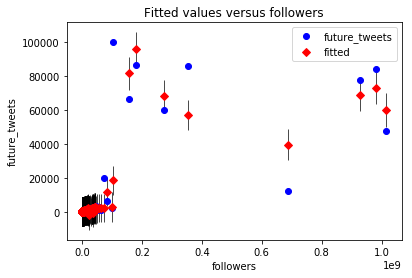

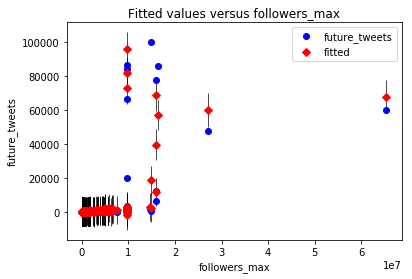

In [31]:
sb49_agg = sb49.groupby(pd.Grouper(key='citation_date_pst',freq='60Min')).agg({
    'hour':'max',
    'tweets':'sum',
    'retweets':'sum',
    'followers':'sum',
    'followers_max':'max'
})
sb49_agg['future_tweets'] = sb49_agg['tweets']
sb49_agg.future_tweets = sb49_agg.future_tweets.shift(-1)
sb49_model = train_ols(sb49_agg, 'sb49 aggregated')

============================= superbowl aggregated ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     463.5
Date:                Sun, 10 Jun 2018   Prob (F-statistic):          6.72e-200
Time:                        13:08:09   Log-Likelihood:                -6039.9
No. Observations:                 586   AIC:                         1.209e+04
Df Residuals:                     580   BIC:                         1.212e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

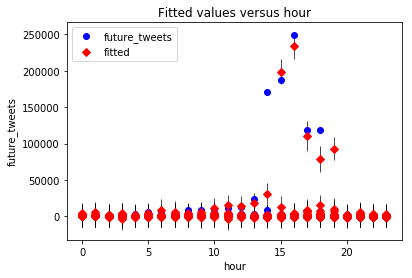

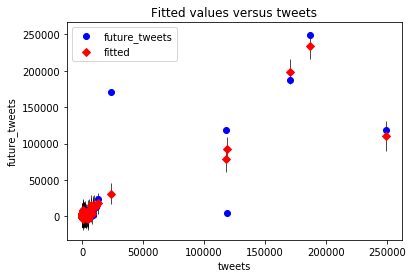

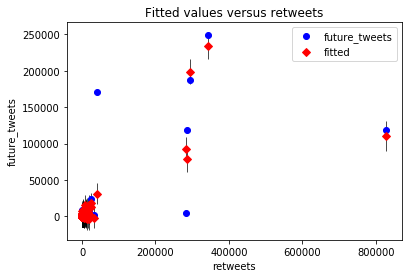

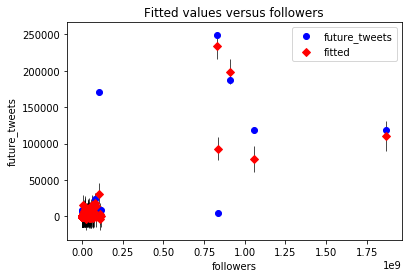

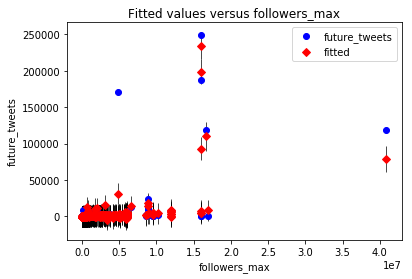

In [32]:
superbowl_agg = superbowl.groupby(pd.Grouper(key='citation_date_pst',freq='60Min')).agg({
    'hour':'max',
    'tweets':'sum',
    'retweets':'sum',
    'followers':'sum',
    'followers_max':'max'
})
superbowl_agg['future_tweets'] = superbowl_agg['tweets']
superbowl_agg.future_tweets = superbowl_agg.future_tweets.shift(-1)
superbowl_model = train_ols(superbowl_agg, 'superbowl aggregated')

In [33]:
# QUESTION 4: Design a regression model using any features from the papers you find or other
# new features you may find useful for this problem. Fit your model on the data of each hashtag and
# report fitting MSE and significance of features.

In [4]:
feature_filenames = ['ECE219_tweet_data/tweets_#gohawks.txt',
            'ECE219_tweet_data/tweets_#gopatriots.txt',
            'ECE219_tweet_data/tweets_#nfl.txt',
            'ECE219_tweet_data/tweets_#patriots.txt',
            'ECE219_tweet_data/tweets_#sb49.txt',
            'ECE219_tweet_data/tweets_#superbowl.txt'
            ]

feature_output_filenames = ['Q1_4#gohawks.txt',
                   'Q1_4#gopatriots.txt',
                   'Q1_4#nfl.txt',
                   'Q1_4#patriots.txt',
                   'Q1_4#sb49.txt',
                   'Q1_4#superbowl.txt']

for i in range(len(feature_filenames)):
    pst_tz = pytz.timezone('US/Pacific')
    
    with open(feature_filenames[i], 'r') as reader:
        feature_headers = [
                   'citation_date_raw',
                   'author_nick_names',
                   'tweets',
                   'retweets',
                   'urls',
                   'mentions',
                   'hashtags',
                   'followers',
                   'followers_max',
                  ]
        with open(feature_output_filenames[i], 'w') as writer:
            feature_csv_writer = csv.writer(writer, lineterminator='\n')
            feature_csv_writer.writerow(feature_headers)
            for line in reader:
                feature_data = json.loads(line)
                feature_response =  [
                            feature_data['citation_date'],
                            feature_data['author']['nick'],
                            1, # there is one tweet at a time..
                            feature_data['metrics']['citations']['total'], #retweets
                            len(feature_data['tweet']['entities']['urls']), #urls
                            len(feature_data['tweet']['entities']['user_mentions']), #mentions
                            len(feature_data['tweet']['entities']['hashtags']), #hashtags
                            feature_data['author']['followers'], #followers
                            feature_data['author']['followers'], #followers
                             ]
                feature_csv_writer.writerow(feature_response)

In [34]:
feature_gohawks = pd.read_csv('Q1_4#gohawks.txt',delimiter=',')
feature_gopatriots = pd.read_csv('Q1_4#gopatriots.txt',delimiter=',')
feature_nfl = pd.read_csv('Q1_4#nfl.txt',delimiter=',')
feature_patriots = pd.read_csv('Q1_4#patriots.txt',delimiter=',')
feature_sb49 = pd.read_csv('Q1_4#sb49.txt',delimiter=',')
feature_superbowl = pd.read_csv('Q1_4#superbowl.txt',delimiter=',')

In [35]:
parse_date_pst(feature_gohawks)
parse_date_pst(feature_gopatriots)
parse_date_pst(feature_nfl)
parse_date_pst(feature_patriots)
parse_date_pst(feature_sb49)
parse_date_pst(feature_superbowl)

In [36]:
feature_gohawks.head()

,citation_date_raw,author_nick_names,tweets,retweets,urls,mentions,hashtags,followers,followers_max,citation_date,citation_date_pst,date,hour,minute
0,1421518778,rejinseattle,1,5,0,0,1,1752.0,1752.0,2015-01-17 18:19:38,2015-01-17 10:19:38-08:00,20150117,10,19
1,1421259536,emq4444,1,2,0,0,2,258.0,258.0,2015-01-14 18:18:56,2015-01-14 10:18:56-08:00,20150114,10,18
2,1421468519,beccadelgado67,1,5,0,0,3,22.0,22.0,2015-01-17 04:21:59,2015-01-16 20:21:59-08:00,20150116,20,21
3,1421468497,beccadelgado67,1,2,1,0,7,22.0,22.0,2015-01-17 04:21:37,2015-01-16 20:21:37-08:00,20150116,20,21
4,1421468336,beccadelgado67,1,2,0,0,1,22.0,22.0,2015-01-17 04:18:56,2015-01-16 20:18:56-08:00,20150116,20,18


In [37]:
def group_features(df):
    df_agg = df.groupby(pd.Grouper(key='citation_date_pst',freq='60Min')).agg({
        'hour':'max',
        'tweets':'sum',
        'retweets':'sum',
        'urls':'sum',
        'mentions':'sum',
        'hashtags':'sum',
        'followers':'sum',
        'followers_max':'max'
    })
    
    return df_agg

In [38]:
feature_gohawks_agg = group_features(feature_gohawks)
feature_gopatriots_agg = group_features(feature_gopatriots)
feature_nfl_agg = group_features(feature_nfl)
feature_patriots_agg = group_features(feature_patriots)
feature_sb49_agg = group_features(feature_sb49)
feature_superbowl_agg = group_features(feature_superbowl)

In [39]:
feature_gohawks_agg.head()

,hour,tweets,retweets,urls,mentions,hashtags,followers,followers_max
citation_date_pst,,,,,,,,
2015-01-14 00:00:00-08:00,0.0,29,459,11,25,62,23814.0,12922.0
2015-01-14 01:00:00-08:00,1.0,13,32,4,10,39,7774.0,2592.0
2015-01-14 02:00:00-08:00,2.0,14,378,8,7,49,26891.0,11886.0
2015-01-14 03:00:00-08:00,3.0,9,28,3,8,23,19094.0,11886.0
2015-01-14 04:00:00-08:00,4.0,24,62,5,28,50,31949.0,9772.0


In [40]:
def significant_features(model, f):
    sig_features = {}
    pval = []
    for i in range(1,len(f)+1):
        pval.append(model.pvalues[i])
    
    for i in range(len(pval)):
        min_val = np.min(pval)
        min_feat = f[pval.index(np.min(pval))]
        sig_features[min_feat] = min_val
        pval.remove(min_val)
        f.remove(min_feat)
    print("Features used and their p-value significance: ", sig_features)
    return sig_features

In [41]:
def regression_model(df, name):
    print("\n=============================" +  name + "=============================")
    df['future_tweets'] = df['tweets']
    df.future_tweets = df.future_tweets.shift(-1)
    model = ols("future_tweets ~ tweets + hour + retweets + urls + mentions + hashtags + followers + followers_max", data=df).fit()
    features = ['tweets', 'hour', 'retweets', 'urls', 'mentions', 'hashtags', 'followers', 'followers_max']
    print("MSE_residual:",model.mse_resid)
    features = significant_features(model, features)
    ypred = model.predict(df)
    print(model.summary())
    return features, ypred

In [42]:

top_features_gohawks_agg, gohawks_pred = regression_model(feature_gohawks_agg, "#gohawks")
top_features_gopatriots_agg, gopatriots_pred = regression_model(feature_gopatriots_agg, "#gopatriots")
top_features_nfl_agg, nfl_pred = regression_model(feature_nfl_agg, "#nfl")
top_features_patriots_agg, patriots_pred = regression_model(feature_patriots_agg, "#patriots")
top_features_sb49_agg, sb49_pred = regression_model(feature_sb49_agg, "#sb49")
top_features_superbowl_agg, superbowl_pred = regression_model(feature_superbowl_agg, "#superbowl")


=============================#gohawks=============================
MSE_residual: 639814.1565025368
Features used and their p-value significance:  {'followers': 8.660688942383287e-07, 'hashtags': 0.0016929458522451655, 'urls': 0.013022315748794188, 'mentions': 0.03046440032673652, 'followers_max': 0.0749443657412937, 'tweets': 0.25679307797249795, 'retweets': 0.4086934219064776, 'hour': 0.8035119962305992}
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     93.47
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           5.19e-98
Time:                        13:11:28   Log-Likelihood:                -4606.3
No. Observations:                 569   AIC:                             9231.
Df Residuals:                     560

In [43]:
# QUESTION 5: For each of the top 3 features (i.e. with the smallest p-values) in your mea-
# surements, draw a scatter plot of predictant (number of tweets for next hour) versus value of that
# feature, using all the samples you have extracted, and analyze it.
# Do the regression coefficients agree with the trends in the plots? If not, why?

In [44]:
def scatter_plotter(x, y, name):
    plt.plot(x, y, 'o')

    plt.title(name)
    plt.xlabel('Predicted Number of Tweets for Next Hour')
    plt.ylabel('Value of ' + name)
    plt.show()
    return

In [45]:
def top_three_features(f, name, pred, df):
    print("\n\n=============================" + name + "=============================")
    top_f = {k: f[k] for k in list(f)[:3]}
    for key in top_f.keys():
        scatter_plotter(list(pred), list(df[key]), key)
    return



=============================#gohawks=============================


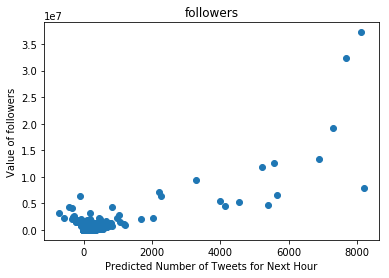

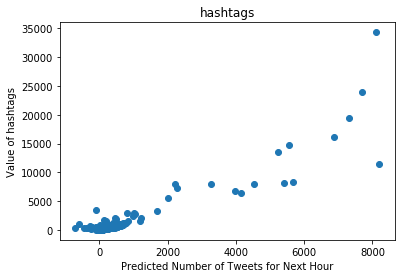

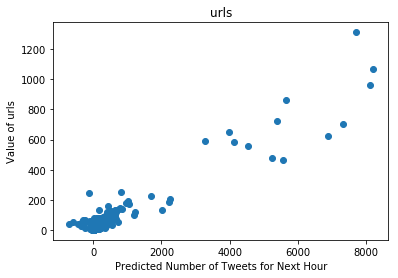



=============================#gopatriots=============================


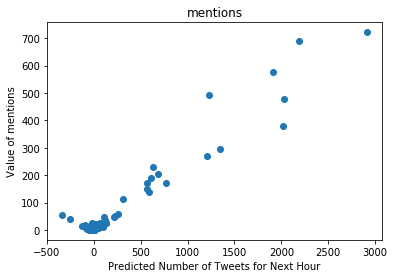

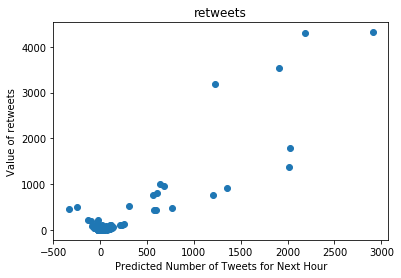

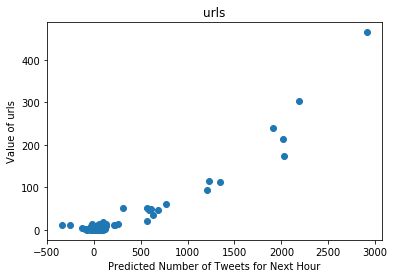



=============================#nfl=============================


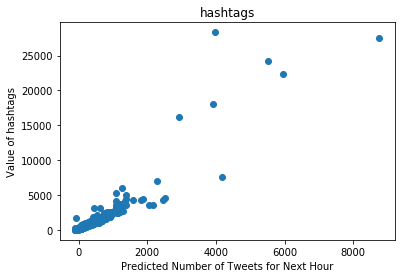

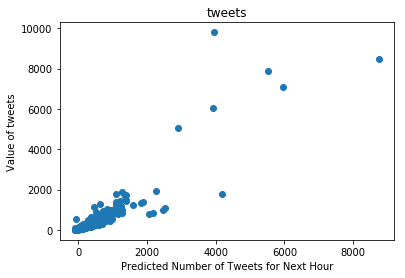

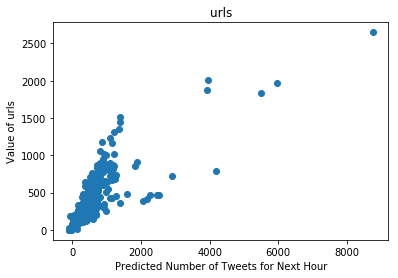



=============================#patriots=============================


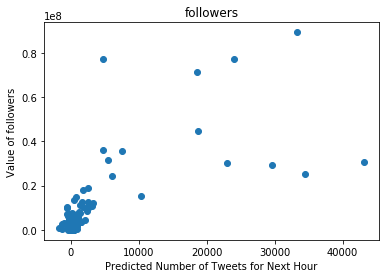

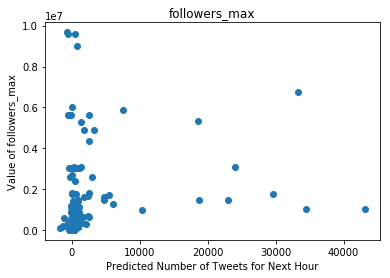

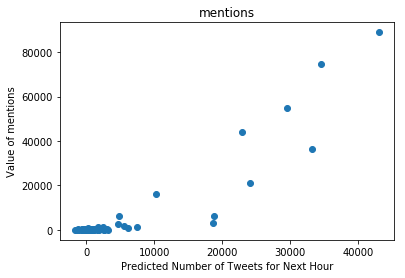



=============================#sb49=============================


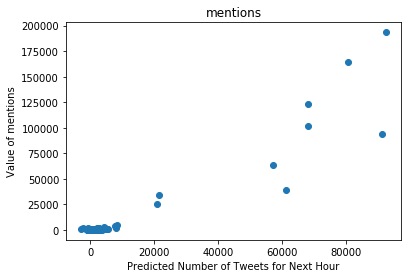

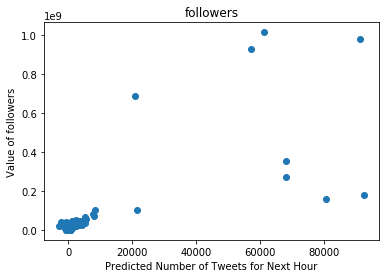

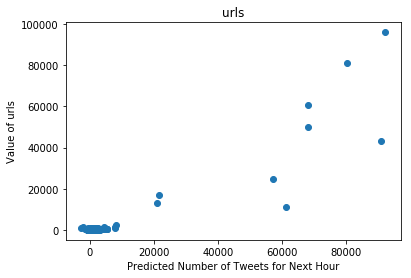



=============================#superbowl=============================


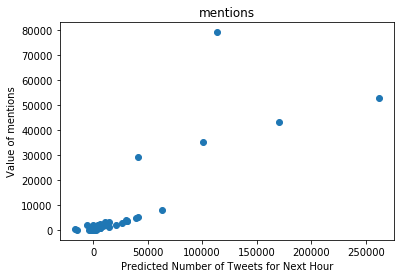

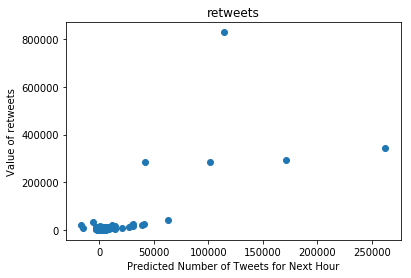

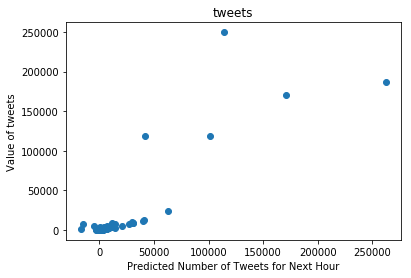

In [46]:
top_three_gohawks = top_three_features(top_features_gohawks_agg, "#gohawks", gohawks_pred, feature_gohawks_agg)
top_three_gopatriots = top_three_features(top_features_gopatriots_agg, "#gopatriots", gopatriots_pred, feature_gopatriots_agg)
top_three_nfl = top_three_features(top_features_nfl_agg, "#nfl", nfl_pred, feature_nfl_agg)
top_three_patriots = top_three_features(top_features_patriots_agg, "#patriots", patriots_pred, feature_patriots_agg)
top_three_sb49 = top_three_features(top_features_sb49_agg, "#sb49", sb49_pred, feature_sb49_agg)
top_three_superbowl = top_three_features(top_features_superbowl_agg, "#superbowl", superbowl_pred, feature_superbowl_agg)

In [47]:
# QUESTION 6: We define three time periods and their corresponding window length as follows:
# 1. Before Feb. 1, 8:00 a.m.: 1-hour window
# 2. Between Feb. 1, 8:00 a.m. and 8:00 p.m.: 5-minute window
# 3. After Feb. 1, 8:00 p.m.: 1-hour window
# For each hashtag, train 3 regression models, one for each of these time periods (the times are all in
# PST). Report the MSE and R-squared score for each case.

In [48]:
def split_three_time_periods_and_train_ols(df,title='Generic'):
    df_pre_active_agg = df[df['citation_date_pst'] < '2015-02-01 08:00:00-0800'].groupby(pd.Grouper(key='citation_date_pst',
                                                                                               freq='60Min')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
    #shifting tweets
    df_pre_active_agg['future_tweets'] = df_pre_active_agg['tweets']
    df_pre_active_agg.future_tweets = df_pre_active_agg.future_tweets.shift(-1)
    df_pre_active_model = train_ols(df_pre_active_agg, title + ' Before Feb. 1, 8:00 a.m.: 1-hour window')
    
    df_active_agg = df[(df['citation_date_pst'] >= '2015-02-01 08:00:00-0800') &
                       (df['citation_date_pst'] <= '2015-02-01 20:00:00-0800')].groupby(pd.Grouper(key='citation_date_pst',
                                                                                           freq='5Min')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
    df_active_agg['future_tweets'] = df_active_agg['tweets']
    df_active_agg.future_tweets = df_active_agg.future_tweets.shift(-1)
    df_active_model = train_ols(df_active_agg, title + ' Between Feb. 1, 8:00 a.m. and 8:00 p.m.: 5-minute window')
    
    df_post_active_agg = df[df['citation_date_pst'] > '2015-02-01 20:00:00-0800'].groupby(pd.Grouper(key='citation_date_pst',
                                                                                           freq='60Min')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
    df_post_active_agg['future_tweets'] = df_post_active_agg['tweets']
    df_post_active_agg.future_tweets = df_post_active_agg.future_tweets.shift(-1)
    df_post_active_model = train_ols(df_post_active_agg, title + ' After Feb. 1, 8:00 p.m.: 1-hour window')
          
    return df_pre_active_model, df_active_model, df_post_active_model, df_pre_active_agg, df_active_agg, df_post_active_agg


============================= Gohawks Before Feb. 1, 8:00 a.m.: 1-hour window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     37.70
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           4.29e-32
Time:                        13:12:04   Log-Likelihood:                -3582.8
No. Observations:                 439   AIC:                             7178.
Df Residuals:                     433   BIC:                             7202.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------

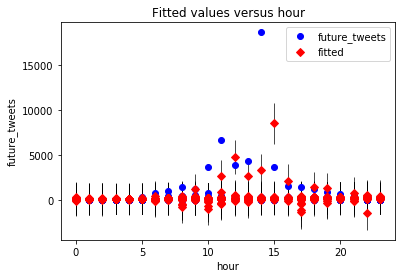

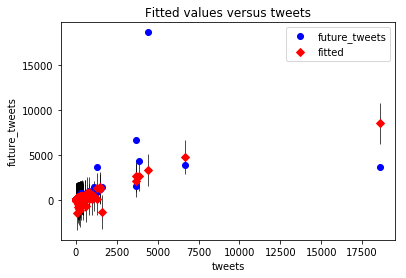

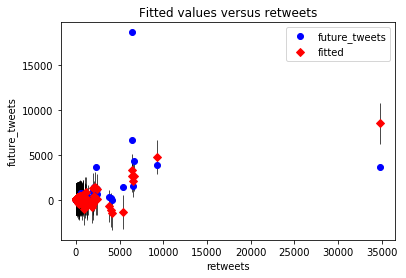

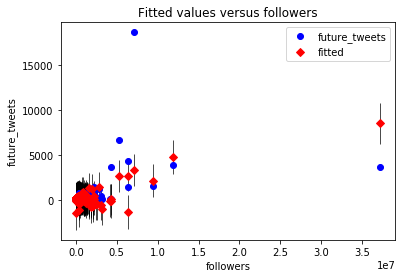

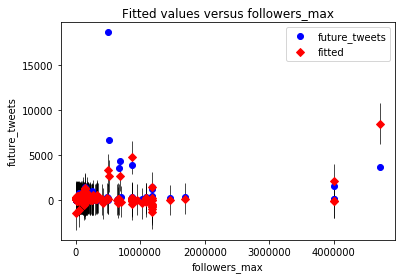

============================= Gohawks Between Feb. 1, 8:00 a.m. and 8:00 p.m.: 5-minute window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     26.77
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           8.21e-19
Time:                        13:12:04   Log-Likelihood:                -1002.4
No. Observations:                 143   AIC:                             2017.
Df Residuals:                     137   BIC:                             2034.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0

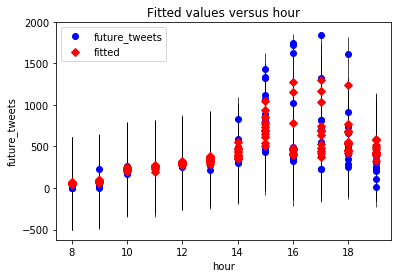

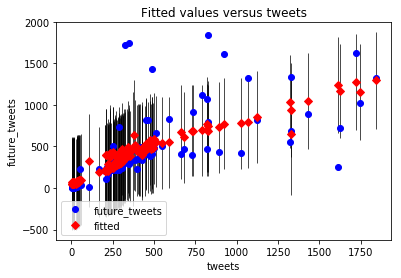

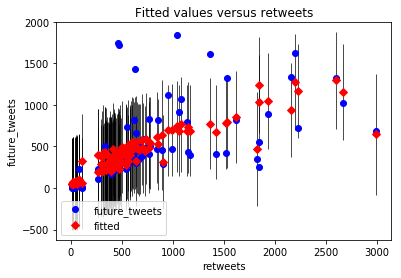

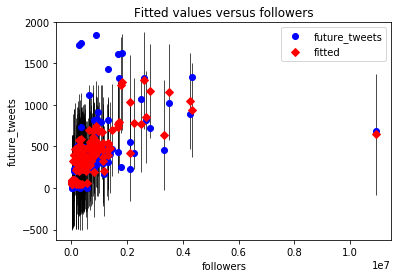

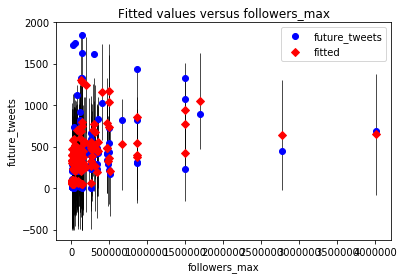

============================= Gohawks After Feb. 1, 8:00 p.m.: 1-hour window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     109.9
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           2.50e-41
Time:                        13:12:05   Log-Likelihood:                -610.26
No. Observations:                 117   AIC:                             1233.
Df Residuals:                     111   BIC:                             1249.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------

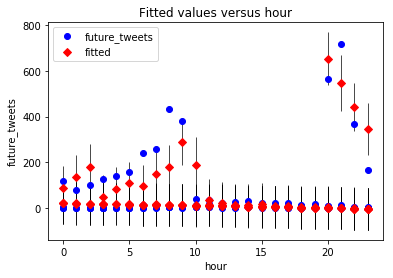

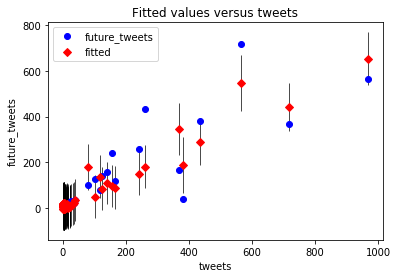

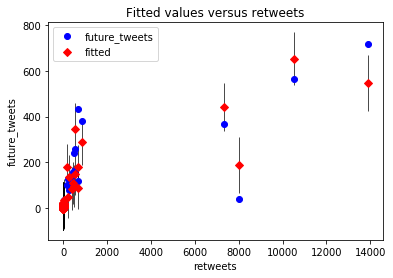

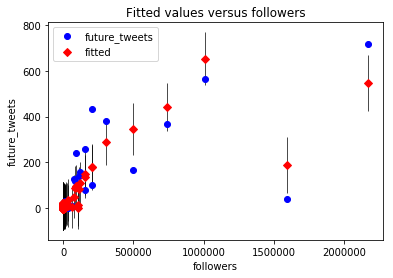

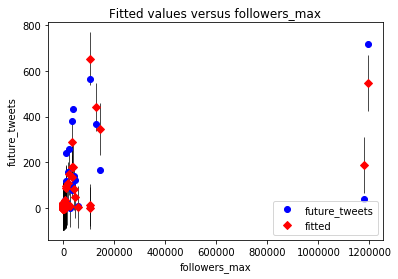

In [49]:
gohawks_pre_active, gohawks_active, gohawks_post_active, gohawks_pre_active_agg, gohawks_active_agg, gohawks_post_active_agg = split_three_time_periods_and_train_ols(gohawks,title='Gohawks')

============================= GoPatriots Before Feb. 1, 8:00 a.m.: 1-hour window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           3.65e-67
Time:                        13:12:11   Log-Likelihood:                -1998.9
No. Observations:                 383   AIC:                             4010.
Df Residuals:                     377   BIC:                             4034.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------

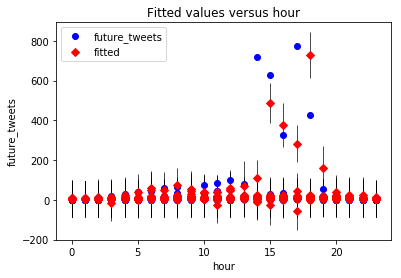

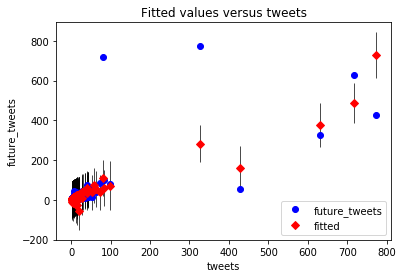

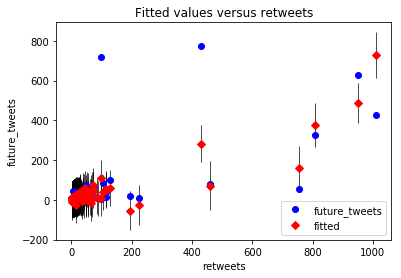

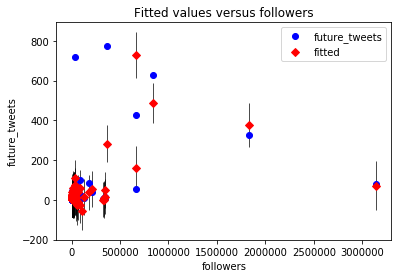

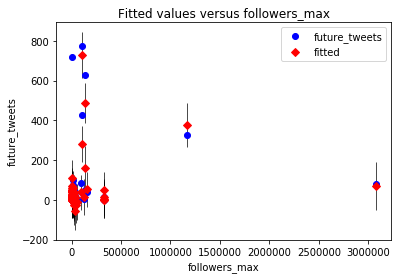

============================= GoPatriots Between Feb. 1, 8:00 a.m. and 8:00 p.m.: 5-minute window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     23.24
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           1.09e-16
Time:                        13:12:11   Log-Likelihood:                -854.02
No. Observations:                 138   AIC:                             1720.
Df Residuals:                     132   BIC:                             1738.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025    

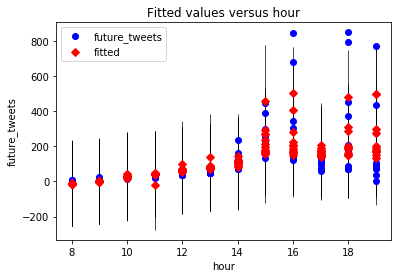

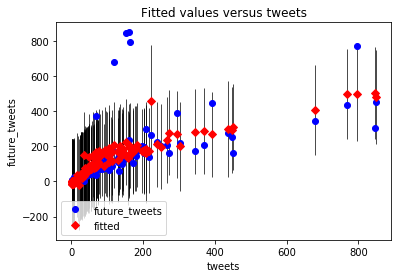

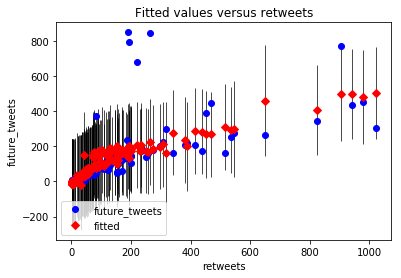

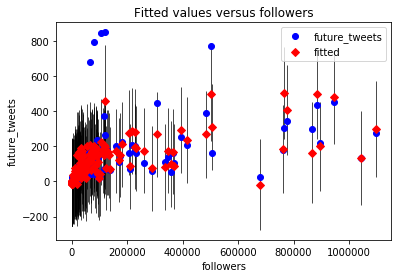

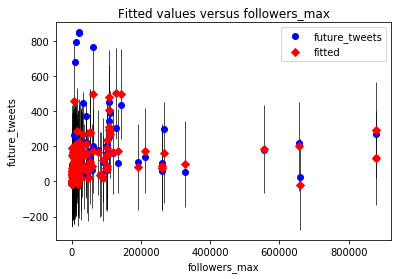

============================= GoPatriots After Feb. 1, 8:00 p.m.: 1-hour window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     16.73
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           1.01e-08
Time:                        13:12:12   Log-Likelihood:                -167.43
No. Observations:                  44   AIC:                             346.9
Df Residuals:                      38   BIC:                             357.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------

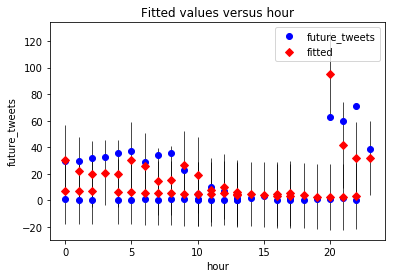

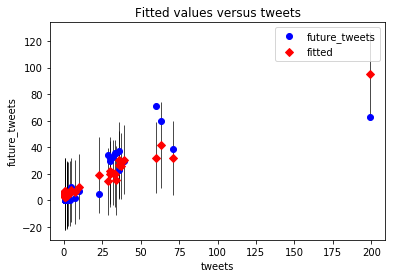

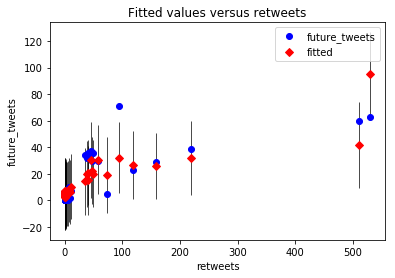

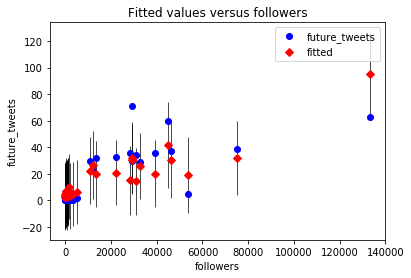

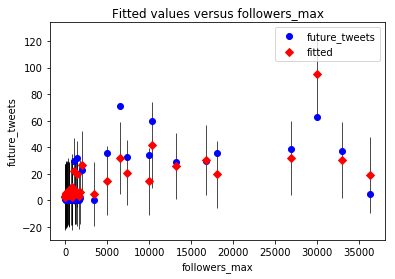

In [50]:
gopatriots_pre_active, gopatriots_active, gopatriots_post_active, gopatriots_pre_active_agg, gopatriots_active_agg, gopatriots_post_active_agg = split_three_time_periods_and_train_ols(gopatriots,title='GoPatriots')

============================= NFL Before Feb. 1, 8:00 a.m.: 1-hour window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     90.75
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           3.55e-65
Time:                        13:12:13   Log-Likelihood:                -3058.5
No. Observations:                 439   AIC:                             6129.
Df Residuals:                     433   BIC:                             6154.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------

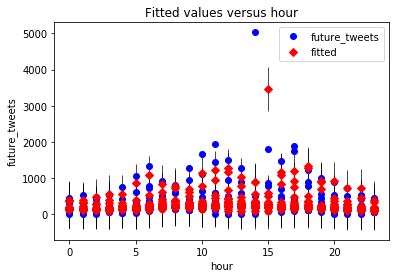

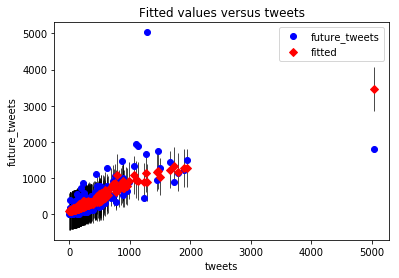

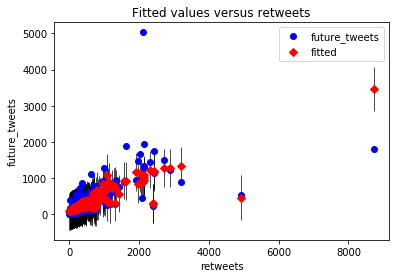

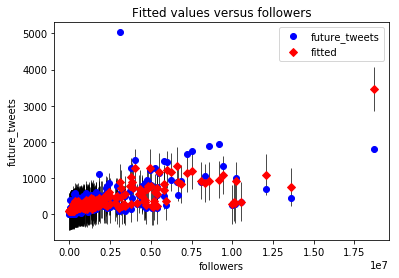

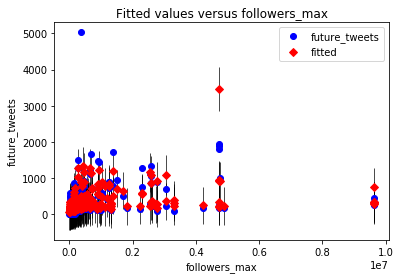

============================= NFL Between Feb. 1, 8:00 a.m. and 8:00 p.m.: 5-minute window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     123.3
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           6.41e-49
Time:                        13:12:14   Log-Likelihood:                -914.53
No. Observations:                 143   AIC:                             1841.
Df Residuals:                     137   BIC:                             1859.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975

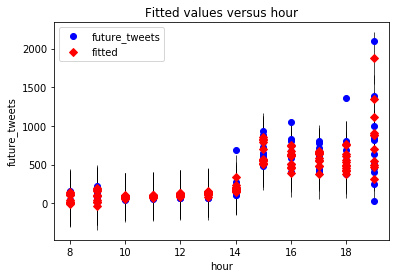

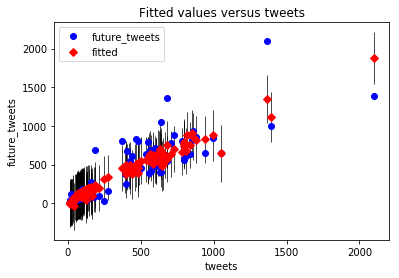

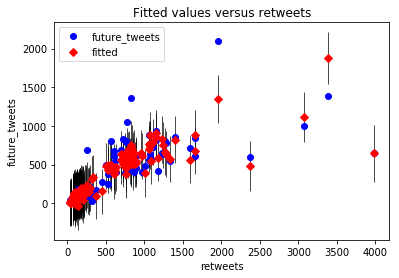

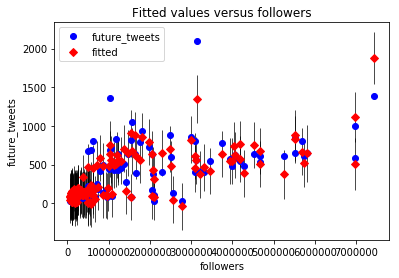

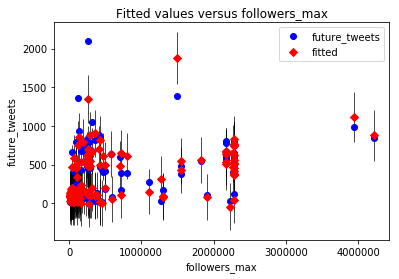

============================= NFL After Feb. 1, 8:00 p.m.: 1-hour window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     94.12
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           1.66e-40
Time:                        13:12:15   Log-Likelihood:                -817.28
No. Observations:                 130   AIC:                             1647.
Df Residuals:                     124   BIC:                             1664.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------

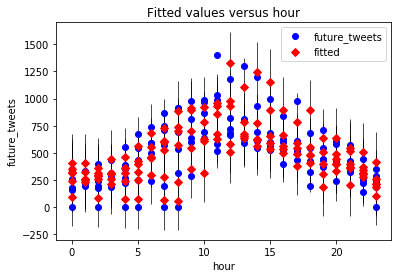

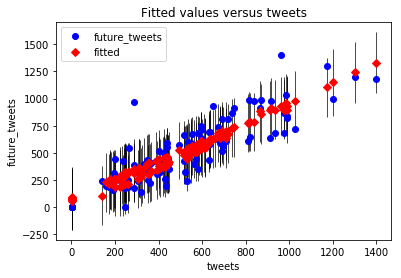

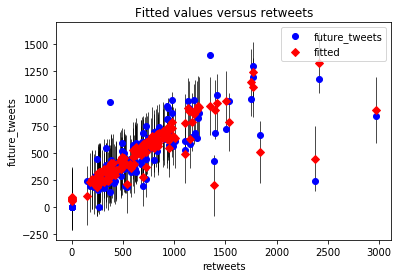

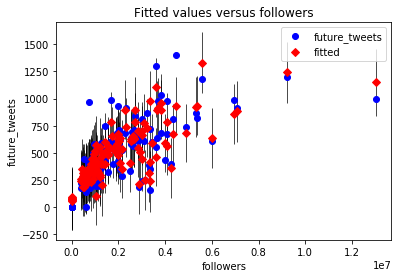

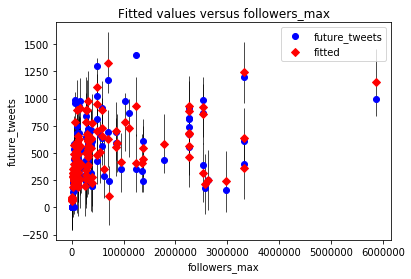

In [51]:
nfl_pre_active, nfl_active, nfl_post_active, nfl_pre_active_agg, nfl_active_agg, nfl_post_active_agg = split_three_time_periods_and_train_ols(nfl,title='NFL')

============================= Patriots Before Feb. 1, 8:00 a.m.: 1-hour window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           1.91e-76
Time:                        13:12:15   Log-Likelihood:                -3417.4
No. Observations:                 439   AIC:                             6847.
Df Residuals:                     433   BIC:                             6871.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------

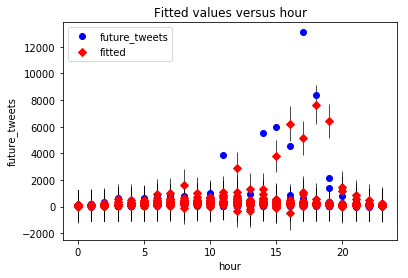

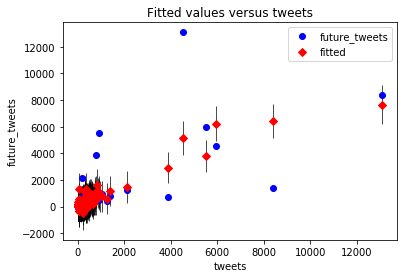

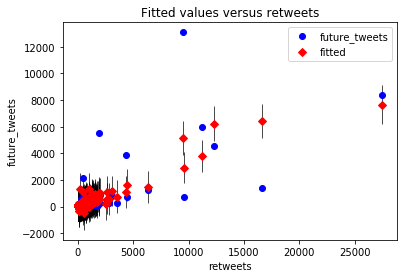

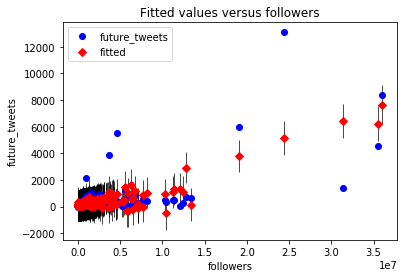

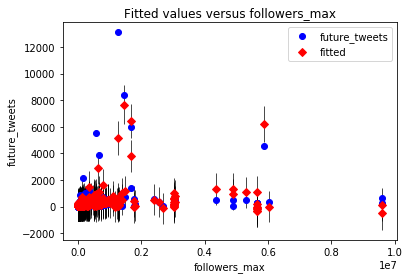

============================= Patriots Between Feb. 1, 8:00 a.m. and 8:00 p.m.: 5-minute window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     67.50
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           2.92e-35
Time:                        13:12:16   Log-Likelihood:                -1162.0
No. Observations:                 143   AIC:                             2336.
Df Residuals:                     137   BIC:                             2354.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      

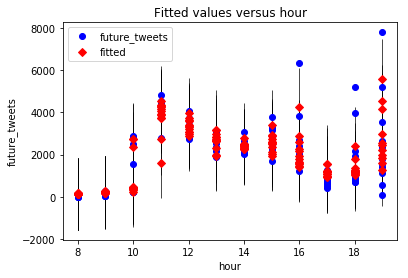

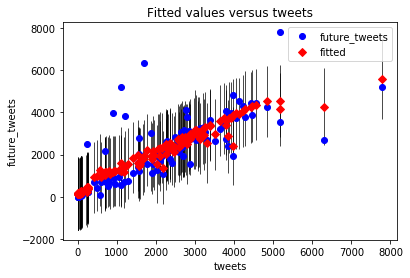

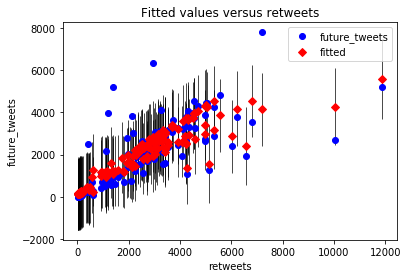

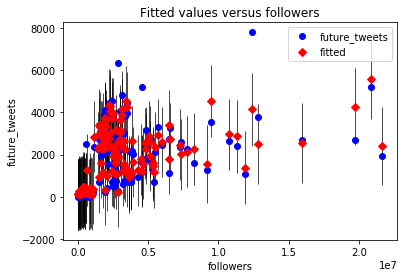

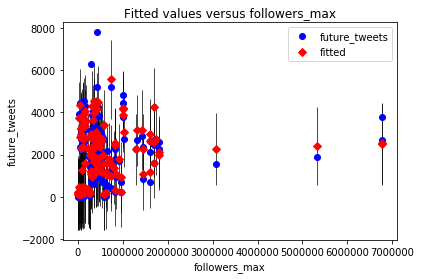

============================= Patriots After Feb. 1, 8:00 p.m.: 1-hour window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     181.3
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           2.72e-56
Time:                        13:12:17   Log-Likelihood:                -814.40
No. Observations:                 134   AIC:                             1641.
Df Residuals:                     128   BIC:                             1658.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------

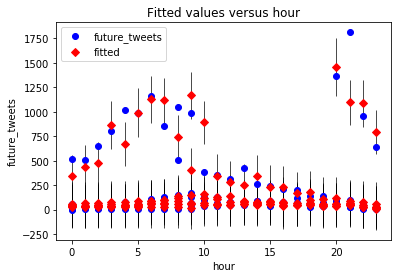

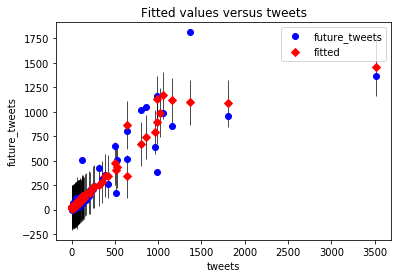

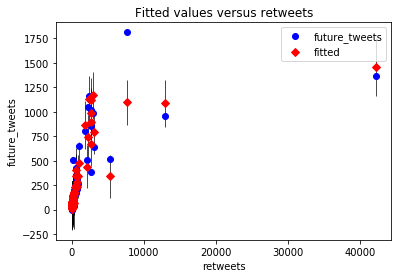

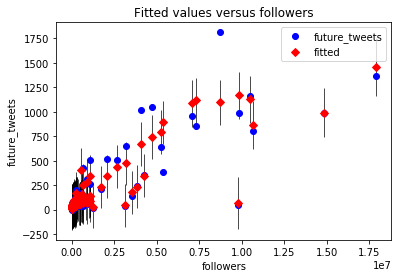

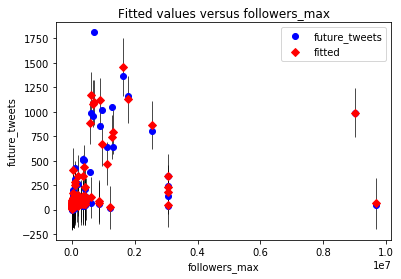

In [52]:
patriots_pre_active, patriots_active, patriots_post_active, patriots_pre_active_agg, patriots_active_agg, patriots_post_active_agg = split_three_time_periods_and_train_ols(patriots,title='Patriots')

============================= SB49 Before Feb. 1, 8:00 a.m.: 1-hour window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     493.1
Date:                Sun, 10 Jun 2018   Prob (F-statistic):          2.12e-164
Time:                        13:12:18   Log-Likelihood:                -2292.1
No. Observations:                 389   AIC:                             4596.
Df Residuals:                     383   BIC:                             4620.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------

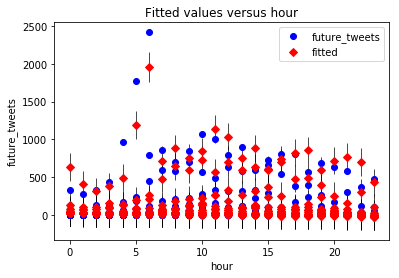

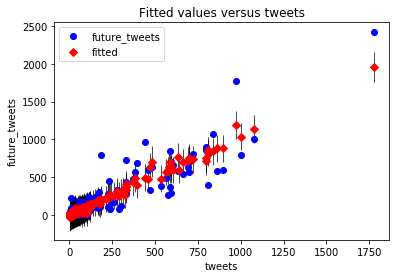

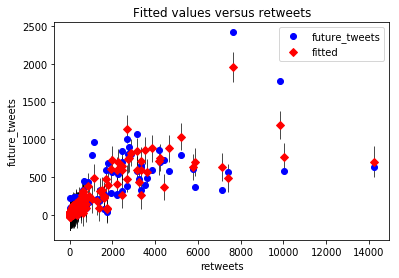

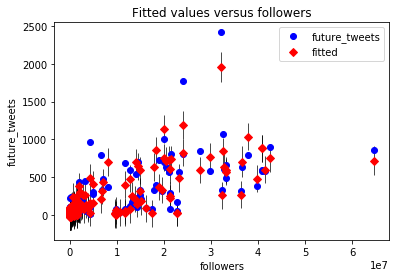

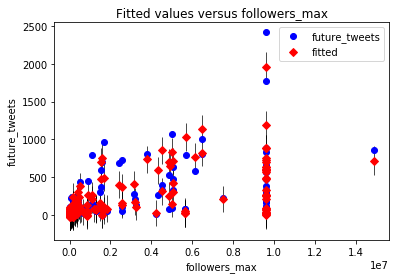

============================= SB49 Between Feb. 1, 8:00 a.m. and 8:00 p.m.: 5-minute window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     172.8
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           2.38e-57
Time:                        13:12:19   Log-Likelihood:                -1210.3
No. Observations:                 143   AIC:                             2433.
Df Residuals:                     137   BIC:                             2450.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.97

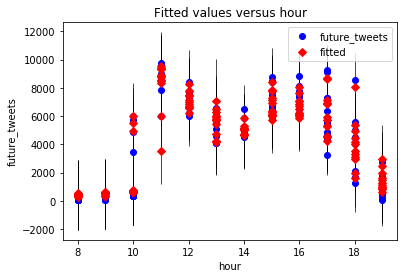

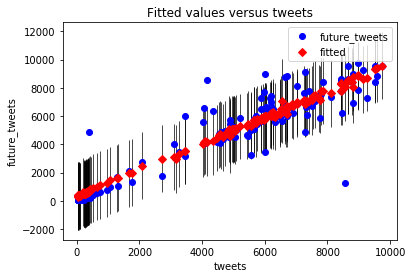

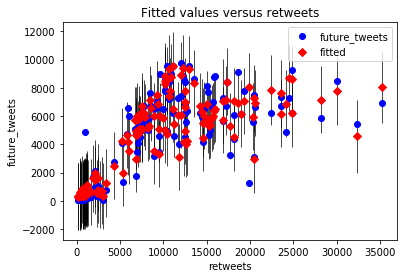

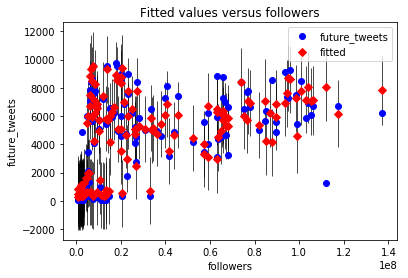

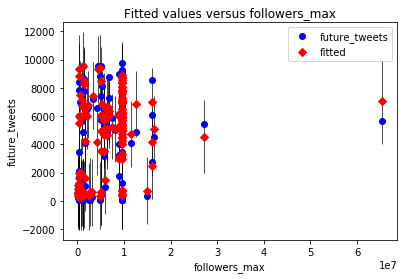

============================= SB49 After Feb. 1, 8:00 p.m.: 1-hour window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     102.1
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           6.05e-43
Time:                        13:12:20   Log-Likelihood:                -940.87
No. Observations:                 134   AIC:                             1894.
Df Residuals:                     128   BIC:                             1911.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------

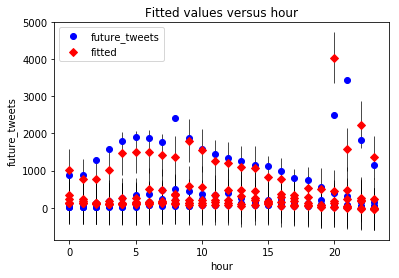

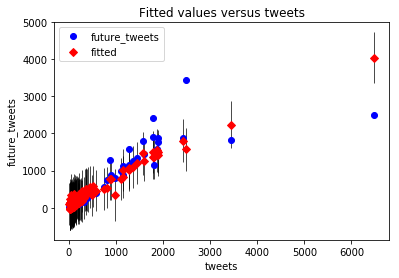

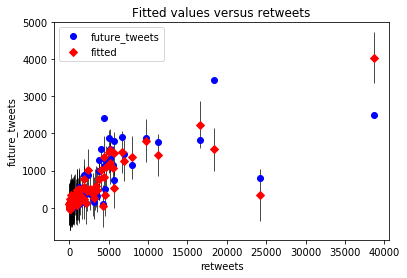

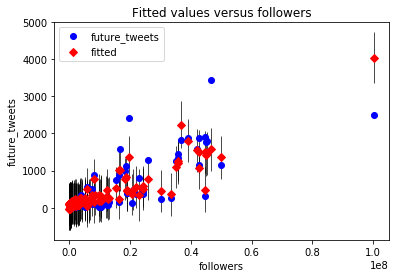

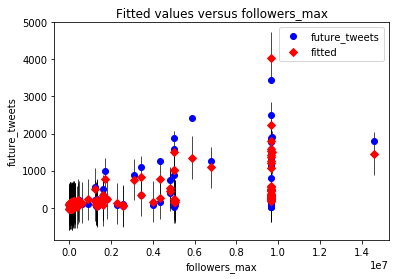

In [53]:
sb49_pre_active, sb49_active, sb49_post_active, sb49_pre_active_agg, sb49_active_agg, sb49_post_active_agg = split_three_time_periods_and_train_ols(sb49,title='SB49')

============================= Superbowl Before Feb. 1, 8:00 a.m.: 1-hour window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     58.26
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           2.63e-46
Time:                        13:12:21   Log-Likelihood:                -3510.1
No. Observations:                 439   AIC:                             7032.
Df Residuals:                     433   BIC:                             7057.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------

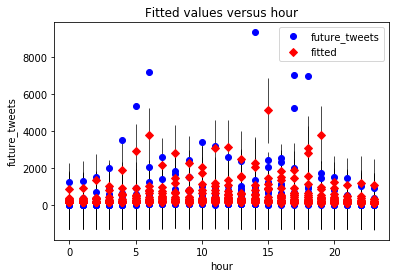

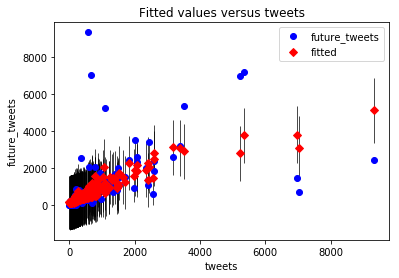

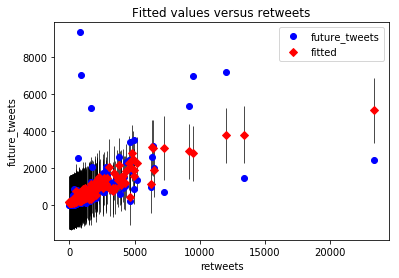

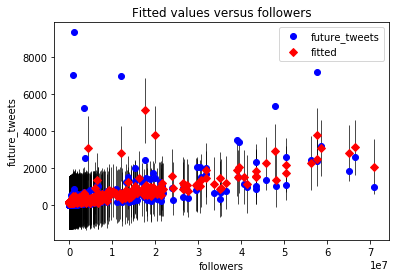

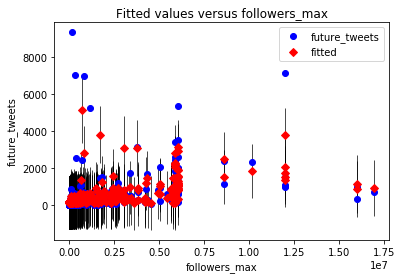

============================= Superbowl Between Feb. 1, 8:00 a.m. and 8:00 p.m.: 5-minute window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           7.17e-64
Time:                        13:12:22   Log-Likelihood:                -1328.4
No. Observations:                 143   AIC:                             2669.
Df Residuals:                     137   BIC:                             2687.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025     

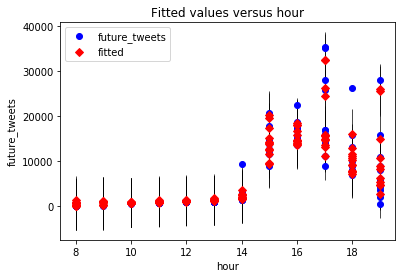

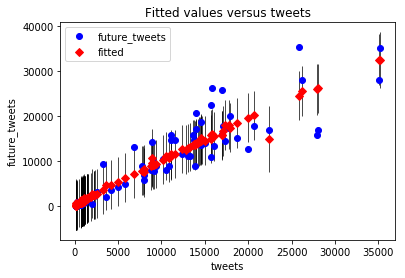

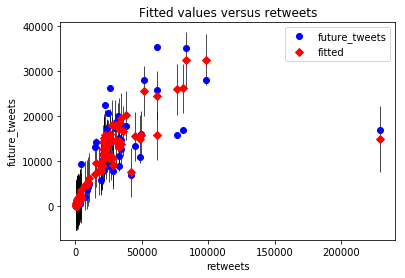

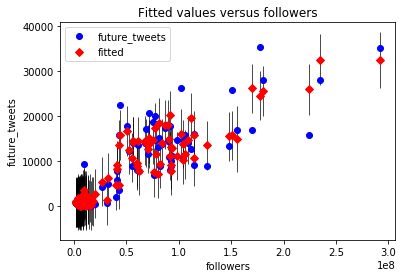

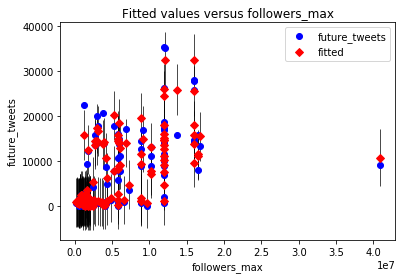

============================= Superbowl After Feb. 1, 8:00 p.m.: 1-hour window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     136.2
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           1.72e-49
Time:                        13:12:23   Log-Likelihood:                -969.42
No. Observations:                 134   AIC:                             1951.
Df Residuals:                     128   BIC:                             1968.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------

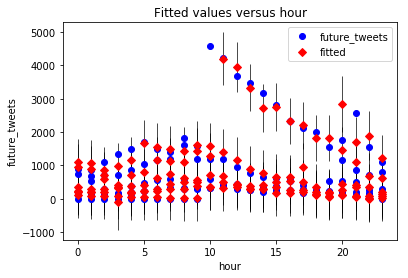

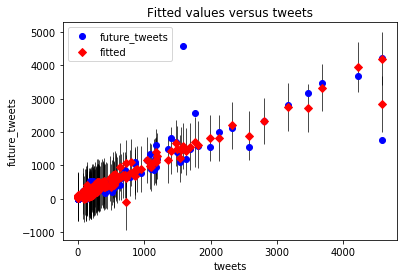

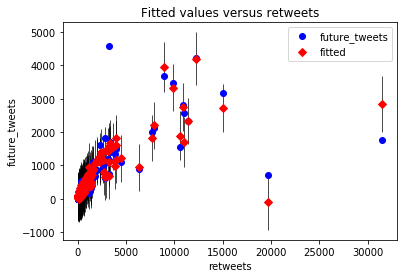

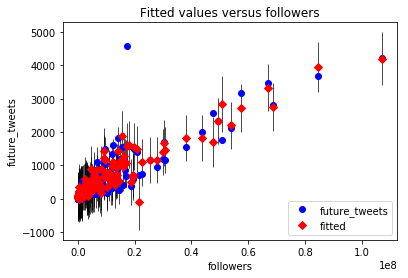

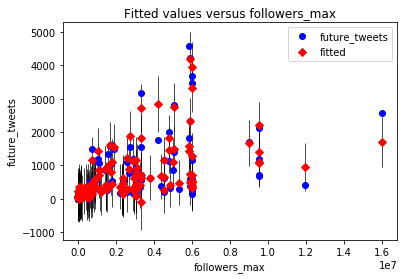

In [54]:
superbowl_pre_active, superbowl_active, superbowl_post_active, superbowl_pre_active_agg, superbowl_active_agg, superbowl_post_active_agg = split_three_time_periods_and_train_ols(superbowl,title='Superbowl')

In [55]:
# QUESTION 7: Also, aggregate the data of all hashtags, and train 3 models (for the intervals
# mentioned above) to predict the number of tweets in the next hour on the aggregated data.
# Perform the same evaluations on your combined model and compare with models you trained for
# individual hashtags.

In [56]:
def get_true_data(df):
    df_pre_active_agg_true = df[(df['citation_date_pst'] >= '2015-02-01 08:00:00-0800') &
                       (df['citation_date_pst'] < '2015-02-01 9:00:00-0800')].groupby(pd.Grouper(key='citation_date_pst',
                                                                                           freq='60T')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
    df_active_agg_true = df[(df['citation_date_pst'] >= '2015-02-01 20:00:00-0800') &
                       (df['citation_date_pst'] < '2015-02-01 20:05:00-0800')].groupby(pd.Grouper(key='citation_date_pst',
                                                                                           freq='5T')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
    df_post_active_agg_true = df[(df['citation_date_pst'] >= '2015-02-07 10:00:00-0800') &
                       (df['citation_date_pst'] < '2015-02-07 11:00:00-0800')].groupby(pd.Grouper(key='citation_date_pst',
                                                                                           freq='60T')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})

    return df_pre_active_agg_true, df_active_agg_true, df_post_active_agg_true

In [57]:
def get_prev_data(df):
    df_pre_active_agg_prev = df[(df['citation_date_pst'] >= '2015-02-01 07:00:00-0800') &
                       (df['citation_date_pst'] < '2015-02-01 8:00:00-0800')].groupby(pd.Grouper(key='citation_date_pst',
                                                                                           freq='60T')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
    df_active_agg_prev = df[(df['citation_date_pst'] >= '2015-02-01 19:55:00-0800') &
                       (df['citation_date_pst'] < '2015-02-01 20:00:00-0800')].groupby(pd.Grouper(key='citation_date_pst',
                                                                                           freq='5T')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
    df_post_active_agg_prev = df[(df['citation_date_pst'] >= '2015-02-07 10:00:00-0800') &
                       (df['citation_date_pst'] < '2015-02-07 11:00:00-0800')].groupby(pd.Grouper(key='citation_date_pst',
                                                                                           freq='60T')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})

    return df_pre_active_agg_prev, df_active_agg_prev, df_post_active_agg_prev

In [58]:
full_df = pd.concat([gohawks, gopatriots, nfl, patriots, sb49, superbowl])

In [59]:
full_df_pre_active_agg_true, full_df_active_agg_true, full_df_post_active_agg_true = get_true_data(full_df)


In [60]:
full_df_pre_active_agg_prev, full_df_active_agg_prev, full_df_post_active_agg_prev = get_prev_data(full_df)


In [61]:
print(full_df_pre_active_agg_true.iloc[0]['tweets'])

print(full_df_active_agg_true.iloc[0]['tweets'])

print(full_df_post_active_agg_true.iloc[0]['tweets'])

8213.0
650.0
52.0


============================= Combined Datasets Before Feb. 1, 8:00 a.m.: 1-hour window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     60.10
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           1.76e-47
Time:                        13:12:32   Log-Likelihood:                -3982.0
No. Observations:                 439   AIC:                             7976.
Df Residuals:                     433   BIC:                             8000.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-

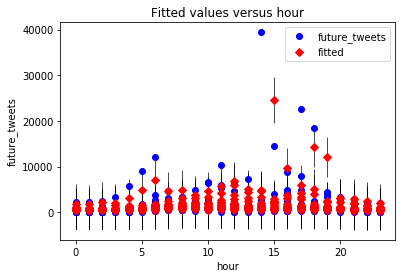

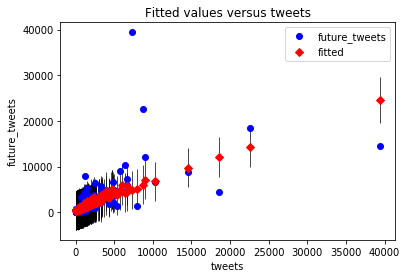

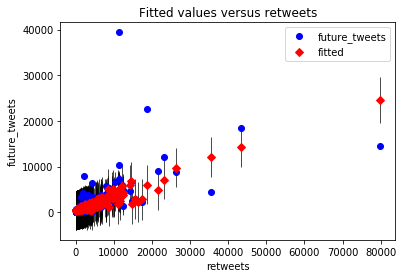

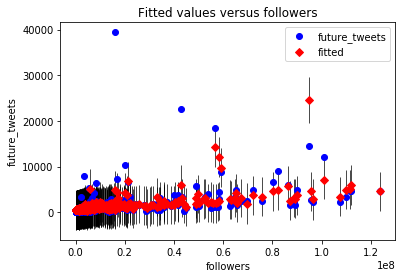

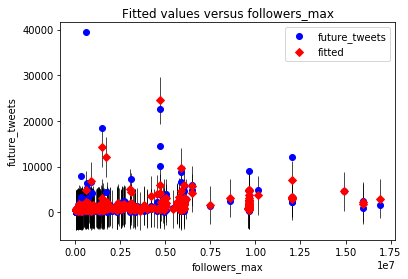

============================= Combined Datasets Between Feb. 1, 8:00 a.m. and 8:00 p.m.: 5-minute window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.3
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           3.86e-54
Time:                        13:12:34   Log-Likelihood:                -1394.8
No. Observations:                 143   AIC:                             2802.
Df Residuals:                     137   BIC:                             2819.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.

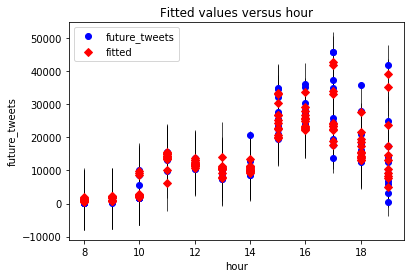

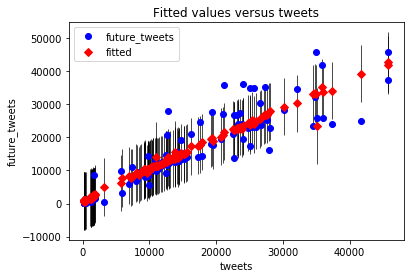

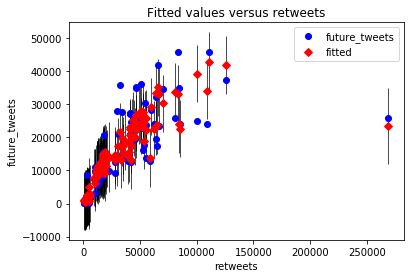

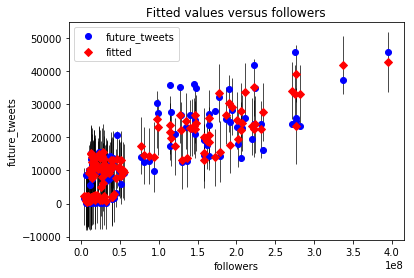

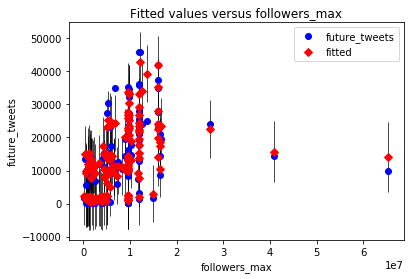

============================= Combined Datasets After Feb. 1, 8:00 p.m.: 1-hour window ======================================
                            OLS Regression Results                            
Dep. Variable:          future_tweets   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     158.9
Date:                Sun, 10 Jun 2018   Prob (F-statistic):           4.04e-53
Time:                        13:12:35   Log-Likelihood:                -1061.7
No. Observations:                 134   AIC:                             2135.
Df Residuals:                     128   BIC:                             2153.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--

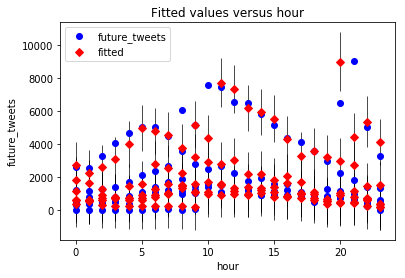

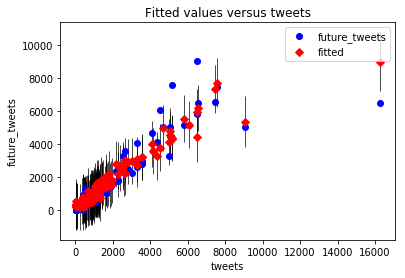

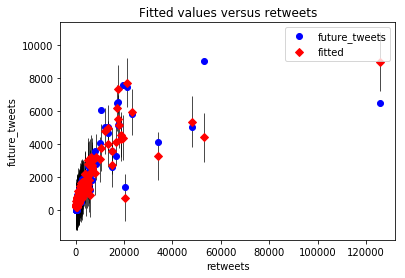

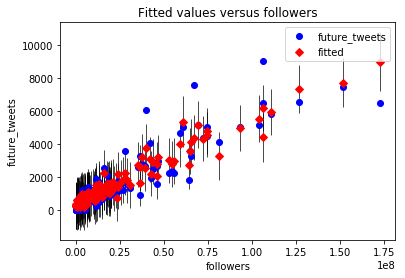

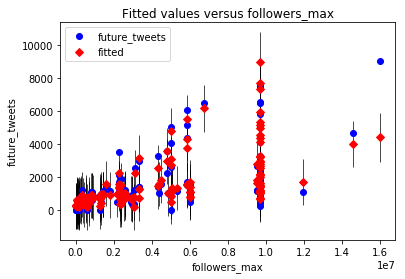

In [62]:
full_df_pre_active, full_df_active, full_df_post_active, full_df_pre_active_agg, full_df_active_agg, full_df_post_active_agg = split_three_time_periods_and_train_ols(full_df,title='Combined Datasets')


In [63]:
pre_active_next_hour = full_df_pre_active_agg.index[-1:]
pre_active_next_hour = pre_active_next_hour.shift(1, freq='60T')
pre_active_next_hour

DatetimeIndex(['2015-02-01 08:00:00-08:00'], dtype='datetime64[ns, America/Los_Angeles]', name='citation_date_pst', freq='60T')

In [64]:
full_df_pre_active.predict(pd.DataFrame({
  'citation_date_pst': pre_active_next_hour, # next hour
    'tweets': full_df_pre_active_agg_prev.iloc[0]['tweets'],
    'hour': 8,
    'retweets': full_df_pre_active_agg_prev.iloc[0]['retweets'],
    'followers': full_df_pre_active_agg_prev.iloc[0]['followers'],
    'followers_max': full_df_pre_active_agg_prev.iloc[0]['followers_max']}, index=[0]))

0    9474.329131
dtype: float64

In [65]:
active_next_five_min = full_df_active_agg.index[-1:]
active_next_five_min = active_next_five_min.shift(1, freq='5T')
active_next_five_min

DatetimeIndex(['2015-02-01 20:00:00-08:00'], dtype='datetime64[ns, America/Los_Angeles]', name='citation_date_pst', freq='5T')

In [66]:
full_df_active.predict(pd.DataFrame({
  'citation_date_pst': active_next_five_min, # next 5 min
    'tweets': full_df_active_agg_prev.iloc[0]['tweets'],
    'hour': 20,
    'retweets': full_df_active_agg_prev.iloc[0]['retweets'],
    'followers': full_df_active_agg_prev.iloc[0]['followers'],
    'followers_max': full_df_active_agg_prev.iloc[0]['followers_max']}, index=[0]))



0    2759.663235
dtype: float64

In [67]:
post_active_next_hour = full_df_post_active_agg.index[-1:]
post_active_next_hour = post_active_next_hour.shift(1, freq='60T')
post_active_next_hour


DatetimeIndex(['2015-02-07 11:00:00-08:00'], dtype='datetime64[ns, America/Los_Angeles]', name='citation_date_pst', freq='60T')

In [68]:
full_df_post_active.predict(pd.DataFrame({
  'citation_date_pst': post_active_next_hour, # next hour
    'tweets': full_df_post_active_agg_prev.iloc[0]['tweets'],
    'hour': 11,
    'retweets': full_df_post_active_agg_prev.iloc[0]['retweets'],
    'followers': full_df_post_active_agg_prev.iloc[0]['followers'],
    'followers_max': full_df_post_active_agg_prev.iloc[0]['followers_max']}, index=[0]))

0    161.4386
dtype: float64

In [69]:
# QUESTION 8: Use grid search to find the best parameter set for RandomForestRegressor and
# GradientBoostingRegressor respectively. Use the following param grid
# {
# 'max_depth': [10, 20, 40, 60, 80, 100, 200, None],
# 'max_features': ['auto', 'sqrt'],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': [200, 400, 600, 800, 1000,
# 1200, 1400, 1600, 1800, 2000]
# }
# Set cv = KFold(5, shuffle=True), scoring='neg mean squared error' for the grid search.
# Analyze the result of the grid search. Do the test errors from cross-validation look good? If not,
# please explain the reason.

In [71]:
def run_grid_search(df_agg):
    params = {
        'max_depth': [10, 20, 40, 60, 80, 100, 200, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
        }

    cv = KFold(5, shuffle=True)
    
    df_agg = df_agg.groupby(pd.Grouper(key='citation_date_pst',freq='60Min')).agg({
        'hour':'max',
        'tweets':'sum',
        'retweets':'sum',
        'followers':'sum',
        'followers_max':'max'
    })
    df_agg['future_tweets'] = df_agg['tweets']
    df_agg.future_tweets = df_agg.future_tweets.shift(-1)
    
    X = np.nan_to_num(df_agg[['hour','tweets','retweets','followers','followers_max']])
    y = np.nan_to_num(df_agg['future_tweets'])

    random_forest_grid = GridSearchCV(RandomForestRegressor(), params,
                                      n_jobs=-1, cv = cv, scoring='neg_mean_squared_error')

    random_forest_grid.fit(X,y)
    
    gradient_boosting_grid = GridSearchCV(GradientBoostingRegressor(), params,
                                      n_jobs=-1, cv = cv, scoring='neg_mean_squared_error')
    gradient_boosting_grid.fit(X,y)
    
    return random_forest_grid, gradient_boosting_grid

In [72]:
# gohawks_random_forest, gohawks_gradient_boosting = run_grid_search(gohawks)

In [73]:
# pickle.dump( gohawks_random_forest, open("gohawks_random_forest.pkl","wb"))
# pickle.dump( gohawks_gradient_boosting, open("gohawks_gradient_boosting.pkl","wb"))

In [74]:
gohawks_random_forest = pickle.load(open("gohawks_random_forest.pkl","rb"))
gohawks_gradient_boosting = pickle.load(open("gohawks_gradient_boosting.pkl","rb"))

-565190.6368497446

In [84]:

warnings.filterwarnings("ignore")

go_hawks_rf_results = pd.DataFrame(gohawks_random_forest.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#optimized params
go_hawks_rf_results.loc[go_hawks_rf_results['mean_test_score'] == go_hawks_rf_results['mean_test_score'].max()]


,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
990,100,sqrt,1,2,200,-78138.058901,-471817.286692


In [109]:
warnings.filterwarnings("ignore")

go_hawks_gb_results = pd.DataFrame(gohawks_gradient_boosting.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
go_hawks_gb_results.loc[go_hawks_gb_results['mean_test_score'] == go_hawks_gb_results['mean_test_score'].max()]


,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
1203,200,sqrt,2,2,800,-12325.35504,-472547.686174


In [114]:
# gopatriots_random_forest, gopatriots_gradient_boosting = run_grid_search(gopatriots)

In [115]:
# pickle.dump( gopatriots_random_forest, open("gopatriots_random_forest.pkl","wb"))
# pickle.dump( gopatriots_gradient_boosting, open("gopatriots_gradient_boosting.pkl","wb"))

In [87]:
gopatriots_random_forest = pickle.load(open("gopatriots_random_forest.pkl","rb"))
gopatriots_gradient_boosting = pickle.load(open("gopatriots_gradient_boosting.pkl","rb"))

In [88]:

warnings.filterwarnings("ignore")

gopatriots_rf_results = pd.DataFrame(gopatriots_random_forest.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
gopatriots_rf_results.loc[gopatriots_rf_results['mean_test_score'] == gopatriots_rf_results['mean_test_score'].max()]



,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
421,40,auto,4,2,400,-17894.237912,-38790.068255


In [90]:

warnings.filterwarnings("ignore")

gopatriots_rf_results = pd.DataFrame(gopatriots_gradient_boosting.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
gopatriots_rf_results.loc[gopatriots_rf_results['mean_test_score'] == gopatriots_rf_results['mean_test_score'].max()]



,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
706,60,sqrt,4,5,1400,-0.489615,-16727.13068


In [116]:
# nfl_random_forest, nfl_gradient_boosting = run_grid_search(nfl)

In [117]:
# pickle.dump( nfl_random_forest, open("nfl_random_forest.pkl","wb"))
# pickle.dump( nfl_gradient_boosting, open("nfl_gradient_boosting.pkl","wb"))

In [91]:
nfl_random_forest = pickle.load(open("nfl_random_forest.pkl","rb"))
nfl_gradient_boosting = pickle.load(open("nfl_gradient_boosting.pkl","rb"))

In [94]:

warnings.filterwarnings("ignore")

nfl_rf_results = pd.DataFrame(nfl_random_forest.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
nfl_rf_results.loc[nfl_rf_results['mean_test_score'] == nfl_rf_results['mean_test_score'].max()]



,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
862,80,sqrt,2,10,600,-182808.670928,-251681.077766


In [95]:

warnings.filterwarnings("ignore")

nfl_gb_results = pd.DataFrame(nfl_gradient_boosting.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
nfl_gb_results.loc[nfl_gb_results['mean_test_score'] == nfl_gb_results['mean_test_score'].max()]


,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
141,10,sqrt,2,10,400,-8.307565,-279390.497395


In [118]:
# patriots_random_forest, patriots_gradient_boosting = run_grid_search(patriots)

In [119]:
# pickle.dump( patriots_random_forest, open("patriots_random_forest.pkl","wb"))
# pickle.dump( patriots_gradient_boosting, open("patriots_gradient_boosting.pkl","wb"))

In [96]:
patriots_random_forest = pickle.load(open("patriots_random_forest.pkl","rb"))
patriots_gradient_boosting = pickle.load(open("patriots_gradient_boosting.pkl","rb"))

In [97]:

warnings.filterwarnings("ignore")

patriots_rf_results = pd.DataFrame(patriots_random_forest.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
patriots_rf_results.loc[patriots_rf_results['mean_test_score'] == patriots_rf_results['mean_test_score'].max()]


,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
181,20,auto,1,2,400,-898688.634664,-5.328324e+06


In [98]:

warnings.filterwarnings("ignore")

patriots_gb_results = pd.DataFrame(patriots_gradient_boosting.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
patriots_gb_results.loc[patriots_gb_results['mean_test_score'] == patriots_gb_results['mean_test_score'].max()]



,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
600,60,auto,4,2,200,-33390.997743,-4.420973e+06


In [120]:
# sb49_random_forest, sb49_gradient_boosting = run_grid_search(sb49)

In [121]:
# pickle.dump( sb49_random_forest, open("sb49_random_forest.pkl","wb"))
# pickle.dump( sb49_gradient_boosting, open("sb49_gradient_boosting.pkl","wb"))

In [100]:
sb49_random_forest = pickle.load(open("sb49_random_forest.pkl","rb"))
sb49_gradient_boosting = pickle.load(open("sb49_gradient_boosting.pkl","rb"))

In [101]:

warnings.filterwarnings("ignore")

sb49_rf_results = pd.DataFrame(sb49_random_forest.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
sb49_rf_results.loc[sb49_rf_results['mean_test_score'] == sb49_rf_results['mean_test_score'].max()]




,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
70,10,auto,4,5,200,-1.132382e+07,-2.764427e+07


In [102]:

warnings.filterwarnings("ignore")

sb49_gb_results = pd.DataFrame(sb49_gradient_boosting.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
sb49_gb_results.loc[sb49_gb_results['mean_test_score'] == sb49_gb_results['mean_test_score'].max()]




,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
94,10,sqrt,1,2,1000,-0.217756,-2.662159e+07


In [122]:
# superbowl_random_forest, superbowl_gradient_boosting = run_grid_search(superbowl)

In [123]:
# pickle.dump( superbowl_random_forest, open("superbowl_random_forest.pkl","wb"))
# pickle.dump( superbowl_gradient_boosting, open("superbowl_gradient_boosting.pkl","wb"))

In [103]:
superbowl_random_forest = pickle.load(open("superbowl_random_forest.pkl","rb"))
superbowl_gradient_boosting = pickle.load(open("superbowl_gradient_boosting.pkl","rb"))

In [104]:

warnings.filterwarnings("ignore")

superbowl_rf_results = pd.DataFrame(superbowl_random_forest.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
superbowl_rf_results.loc[superbowl_rf_results['mean_test_score'] == superbowl_rf_results['mean_test_score'].max()]



,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
60,10,auto,4,2,200,-6.850065e+07,-1.219276e+08


In [105]:

warnings.filterwarnings("ignore")

superbowl_gb_results = pd.DataFrame(superbowl_gradient_boosting.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
superbowl_gb_results.loc[superbowl_gb_results['mean_test_score'] == superbowl_gb_results['mean_test_score'].max()]




,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
13,10,auto,1,5,800,-9.922628e-08,-1.157875e+08


In [124]:
# full_df_random_forest, full_df_gradient_boosting = run_grid_search(full_df)

In [125]:
# pickle.dump( full_df_random_forest, open("full_df_random_forest.pkl","wb"))
# pickle.dump( full_df_gradient_boosting, open("full_df_gradient_boosting.pkl","wb"))

In [106]:
full_df_random_forest = pickle.load(open("full_df_random_forest.pkl","rb"))
full_df_gradient_boosting = pickle.load(open("full_df_gradient_boosting.pkl","rb"))

In [107]:

warnings.filterwarnings("ignore")

full_df_rf_results = pd.DataFrame(full_df_random_forest.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
full_df_rf_results.loc[full_df_rf_results['mean_test_score'] == full_df_rf_results['mean_test_score'].max()]



,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
820,80,sqrt,1,5,200,-9.877613e+07,-1.987897e+08


In [108]:

warnings.filterwarnings("ignore")

full_df_gb_results = pd.DataFrame(full_df_gradient_boosting.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
full_df_gb_results.loc[full_df_gb_results['mean_test_score'] == full_df_gb_results['mean_test_score'].max()]



,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
1397,None,sqrt,2,5,1600,-0.000202,-3.160692e+08


In [ ]:
# QUESTION 9: Compare the best estimator you found in the grid search with OLS on the entire
# dataset.

In [110]:
def aggregate_df(df):
    df_agg = df.groupby(pd.Grouper(key='citation_date_pst',freq='60Min')).agg({
        'hour':'max',
        'tweets':'sum',
        'retweets':'sum',
        'followers':'sum',
        'followers_max':'max'
    })
    df_agg['future_tweets'] = df_agg['tweets']
    df_agg.future_tweets = df_agg.future_tweets.shift(-1)
    
    X = np.nan_to_num(df_agg[['hour','tweets','retweets','followers','followers_max']])
    y = np.nan_to_num(df_agg['future_tweets'])
    
    return X, y

In [111]:
gohawks_X, gohawks_y = aggregate_df(gohawks)
gopatriots_X, gopatriots_y = aggregate_df(gopatriots)
nfl_X, nfl_y = aggregate_df(nfl)
patriots_X, patriots_y = aggregate_df(patriots)
sb49_X, sb49_y = aggregate_df(sb49)
superbowl_X, superbowl_y = aggregate_df(superbowl)

In [112]:
gohawks_opt_rf = RandomForestRegressor(max_depth=100,
                                       max_features='sqrt',
                                       min_samples_leaf=1,
                                       min_samples_split=2,
                                       n_estimators=200)
gohawks_opt_rf.fit(gohawks_X,gohawks_y)

gohawks_opt_gb = GradientBoostingRegressor(max_depth=200,
                                           max_features='sqrt',
                                           min_samples_leaf=2,
                                           min_samples_split=2,
                                           n_estimators=800)
gohawks_opt_gb.fit(gohawks_X,gohawks_y)

print('#Gohawks Random Forest R^2:',gohawks_opt_rf.score(gohawks_X,gohawks_y))
print('#Gohawks Gradient Boosting R^2:',gohawks_opt_gb.score(gohawks_X,gohawks_y))




#Gohawks Random Forest R^2: 0.9458939202304865
#Gohawks Gradient Boosting R^2: 0.9886362262300217


In [113]:
gopatriots_opt_rf = RandomForestRegressor(max_depth=40,
                                       max_features='auto',
                                       min_samples_leaf=4,
                                       min_samples_split=2,
                                       n_estimators=400)
gopatriots_opt_rf.fit(gopatriots_X,gopatriots_y)

gopatriots_opt_gb = GradientBoostingRegressor(max_depth=60,
                                           max_features='sqrt',
                                           min_samples_leaf=4,
                                           min_samples_split=5,
                                           n_estimators=1400)
gopatriots_opt_gb.fit(gopatriots_X,gopatriots_y)

print('#GoPatriots Random Forest R^2:',gopatriots_opt_rf.score(gopatriots_X,gopatriots_y))
print('#GoPatriots Gradient Boosting R^2:',gopatriots_opt_gb.score(gopatriots_X,gopatriots_y))




#GoPatriots Random Forest R^2: 0.7795232642451974
#GoPatriots Gradient Boosting R^2: 0.9999934918398821


In [114]:
nfl_opt_rf = RandomForestRegressor(max_depth=80,
                                       max_features='sqrt',
                                       min_samples_leaf=2,
                                       min_samples_split=10,
                                       n_estimators=600)
nfl_opt_rf.fit(nfl_X,nfl_y)

nfl_opt_gb = GradientBoostingRegressor(max_depth=10,
                                           max_features='sqrt',
                                           min_samples_leaf=2,
                                           min_samples_split=10,
                                           n_estimators=400)
nfl_opt_gb.fit(nfl_X,nfl_y)

print('#nfl Random Forest R^2:',nfl_opt_rf.score(nfl_X,nfl_y))
print('#nfl Gradient Boosting R^2:',nfl_opt_gb.score(nfl_X,nfl_y))




#nfl Random Forest R^2: 0.7034818352653016
#nfl Gradient Boosting R^2: 0.9999988332644294


In [115]:
patriots_opt_rf = RandomForestRegressor(max_depth=20,
                                       max_features='auto',
                                       min_samples_leaf=1,
                                       min_samples_split=2,
                                       n_estimators=400)
patriots_opt_rf.fit(patriots_X,patriots_y)

patriots_opt_gb = GradientBoostingRegressor(max_depth=60,
                                           max_features='auto',
                                           min_samples_leaf=4,
                                           min_samples_split=2,
                                           n_estimators=200)
patriots_opt_gb.fit(patriots_X,patriots_y)

print('#Patriots Random Forest R^2:',patriots_opt_rf.score(patriots_X,patriots_y))
print('#Patriots Gradient Boosting R^2:',patriots_opt_gb.score(patriots_X,patriots_y))




#Patriots Random Forest R^2: 0.9521666823221344
#Patriots Gradient Boosting R^2: 0.9992990516725627


In [116]:
sb49_opt_rf = RandomForestRegressor(max_depth=10,
                                       max_features='auto',
                                       min_samples_leaf=4,
                                       min_samples_split=5,
                                       n_estimators=200)
sb49_opt_rf.fit(sb49_X,sb49_y)

sb49_opt_gb = GradientBoostingRegressor(max_depth=10,
                                           max_features='sqrt',
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           n_estimators=1000)
sb49_opt_gb.fit(sb49_X,sb49_y)

print('#sb49 Random Forest R^2:',sb49_opt_rf.score(sb49_X,sb49_y))
print('#sb49 Gradient Boosting R^2:',sb49_opt_gb.score(sb49_X,sb49_y))




#sb49 Random Forest R^2: 0.87102896803117
#sb49 Gradient Boosting R^2: 0.9999999973525205


In [117]:
superbowl_opt_rf = RandomForestRegressor(max_depth=10,
                                       max_features='auto',
                                       min_samples_leaf=4,
                                       min_samples_split=2,
                                       n_estimators=200)
superbowl_opt_rf.fit(superbowl_X,superbowl_y)

superbowl_opt_gb = GradientBoostingRegressor(max_depth=10,
                                           max_features='auto',
                                           min_samples_leaf=1,
                                           min_samples_split=5,
                                           n_estimators=800)
superbowl_opt_gb.fit(superbowl_X,superbowl_y)

print('#superbowl Random Forest R^2:',superbowl_opt_rf.score(superbowl_X,superbowl_y))
print('#superbowl Gradient Boosting R^2:',superbowl_opt_gb.score(superbowl_X,superbowl_y))




#superbowl Random Forest R^2: 0.7455639706831028
#superbowl Gradient Boosting R^2: 0.9999999999999996


In [ ]:
# QUESTION 10: For each time period described in Question 6, perform the same grid search
# above for GradientBoostingRegressor (with corresponding time window length). Does the cross-
# validation test error change? Are the best parameter set you find in each period agree with those
# you found above?

In [35]:
def run_grid_search_splitted_time(df):
    params = {
        'max_depth': [10, 20, 40, 60, 80, 100, 200, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
        }
    
    cv = KFold(5, shuffle=True)
        
    df_pre_active_agg = df[df['citation_date_pst'] < '2015-02-01 08:00:00-0800'].groupby(pd.Grouper(key='citation_date_pst',
                                                                                               freq='60Min')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
    #shifting tweets
    df_pre_active_agg['future_tweets'] = df_pre_active_agg['tweets']
    df_pre_active_agg.future_tweets = df_pre_active_agg.future_tweets.shift(-1)
    
    df_active_agg = df[(df['citation_date_pst'] >= '2015-02-01 08:00:00-0800') &
                       (df['citation_date_pst'] <= '2015-02-01 20:00:00-0800')].groupby(pd.Grouper(key='citation_date_pst',
                                                                                           freq='5Min')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
    df_active_agg['future_tweets'] = df_active_agg['tweets']
    df_active_agg.future_tweets = df_active_agg.future_tweets.shift(-1)
    
    df_post_active_agg = df[df['citation_date_pst'] > '2015-02-01 20:00:00-0800'].groupby(pd.Grouper(key='citation_date_pst',
                                                                                           freq='60Min')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
    df_post_active_agg['future_tweets'] = df_post_active_agg['tweets']
    df_post_active_agg.future_tweets = df_post_active_agg.future_tweets.shift(-1)
    
    df_pre_active_agg_X = np.nan_to_num(df_pre_active_agg[['hour','tweets','retweets','followers','followers_max']])
    df_pre_active_agg_y = np.nan_to_num(df_pre_active_agg['future_tweets'])
    
    #pre active traing
    rf_pre_active_grid = GridSearchCV(RandomForestRegressor(), params,
                                      n_jobs=-1, cv = cv, scoring='neg_mean_squared_error')
    rf_pre_active_grid.fit(df_pre_active_agg_X,df_pre_active_agg_y)
    
    gb_pre_active_grid = GridSearchCV(RandomForestRegressor(), params,
                                      n_jobs=-1, cv = cv, scoring='neg_mean_squared_error')
    gb_pre_active_grid.fit(df_pre_active_agg_X,df_pre_active_agg_y)
    
    
    df_active_agg_X = np.nan_to_num(df_active_agg[['hour','tweets','retweets','followers','followers_max']])
    df_active_agg_y = np.nan_to_num(df_active_agg['future_tweets'])
    
    #active train
    rf_active_grid = GridSearchCV(RandomForestRegressor(), params,
                                      n_jobs=-1, cv = cv, scoring='neg_mean_squared_error')
    rf_active_grid.fit(df_active_agg_X,df_active_agg_y)
    
    gb_active_grid = GridSearchCV(RandomForestRegressor(), params,
                                      n_jobs=-1, cv = cv, scoring='neg_mean_squared_error')
    gb_active_grid.fit(df_active_agg_X,df_active_agg_y)
    
    df_post_active_agg_X = np.nan_to_num(df_post_active_agg[['hour','tweets','retweets','followers','followers_max']])
    df_post_active_agg_y = np.nan_to_num(df_post_active_agg['future_tweets'])
    
    #post active train
    rf_post_active_grid = GridSearchCV(RandomForestRegressor(), params,
                                      n_jobs=-1, cv = cv, scoring='neg_mean_squared_error')
    rf_post_active_grid.fit(df_post_active_agg_X,df_post_active_agg_y)
    
    gb_post_active_grid = GridSearchCV(RandomForestRegressor(), params,
                                      n_jobs=-1, cv = cv, scoring='neg_mean_squared_error')
    gb_post_active_grid.fit(df_post_active_agg_X,df_post_active_agg_y)
   
    return rf_pre_active_grid, gb_pre_active_grid, rf_active_grid, gb_active_grid, rf_post_active_grid, gb_post_active_grid
    

In [28]:
# gohawks_rf_pre_active_grid, gohawks_gb_pre_active_grid, gohawks_rf_active_grid, gohawks_gb_active_grid, gohawks_rf_post_active_grid, gohawks_gb_post_active_grid = run_grid_search_splitted_time(gohawks)




In [29]:
# pickle.dump( gohawks_rf_pre_active_grid, open("gohawks_rf_pre_active_grid.pkl","wb"))
# pickle.dump( gohawks_gb_pre_active_grid, open("gohawks_gb_pre_active_grid.pkl","wb"))

# pickle.dump( gohawks_rf_active_grid, open("gohawks_rf_active_grid.pkl","wb"))
# pickle.dump( gohawks_gb_active_grid, open("gohawks_gb_active_grid.pkl","wb"))

# pickle.dump( gohawks_rf_post_active_grid, open("gohawks_rf_post_active_grid.pkl","wb"))
# pickle.dump( gohawks_gb_post_active_grid, open("gohawks_gb_post_active_grid.pkl","wb"))


In [170]:
gohawks_rf_pre_active_grid = pickle.load(open("gohawks_rf_pre_active_grid.pkl","rb"))
gohawks_gb_pre_active_grid = pickle.load(open("gohawks_gb_pre_active_grid.pkl","rb"))

gohawks_rf_active_grid = pickle.load(open("gohawks_rf_active_grid.pkl","rb"))
gohawks_gb_active_grid = pickle.load(open("gohawks_gb_active_grid.pkl","rb"))

gohawks_rf_post_active_grid = pickle.load(open("gohawks_rf_post_active_grid.pkl","rb"))
gohawks_gb_post_active_grid = pickle.load(open("gohawks_gb_post_active_grid.pkl","rb"))

In [214]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(gohawks_rf_pre_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
622,60,auto,4,10,600,-465040.578833,-581925.12538


In [215]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(gohawks_rf_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
530,40,sqrt,4,10,200,-47329.142922,-76476.012147


In [216]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(gohawks_rf_post_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
1060,100,sqrt,4,5,200,-2618.375706,-3346.876119


In [230]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(gohawks_gb_pre_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
1230,200,sqrt,4,2,200,-468558.931341,-669703.794728


In [231]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(gohawks_gb_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
1250,200,sqrt,4,10,200,-45956.864665,-81484.552586


In [232]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(gohawks_gb_post_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
240,20,auto,4,2,200,-2535.477592,-3298.67036


In [30]:
# gopatriots_rf_pre_active_grid, gopatriots_gb_pre_active_grid, gopatriots_rf_active_grid, gopatriots_gb_active_grid, gopatriots_rf_post_active_grid, gopatriots_gb_post_active_grid = run_grid_search_splitted_time(gopatriots)




In [31]:
# pickle.dump( gopatriots_rf_pre_active_grid, open("gopatriots_rf_pre_active_grid.pkl","wb"))
# pickle.dump( gopatriots_gb_pre_active_grid, open("gopatriots_gb_pre_active_grid.pkl","wb"))

# pickle.dump( gopatriots_rf_active_grid, open("gopatriots_rf_active_grid.pkl","wb"))
# pickle.dump( gopatriots_gb_active_grid, open("gopatriots_gb_active_grid.pkl","wb"))

# pickle.dump( gopatriots_rf_post_active_grid, open("gopatriots_rf_post_active_grid.pkl","wb"))
# pickle.dump( gopatriots_gb_post_active_grid, open("gopatriots_gb_post_active_grid.pkl","wb"))


In [179]:
gopatriots_rf_pre_active_grid = pickle.load(open("gopatriots_rf_pre_active_grid.pkl","rb"))
gopatriots_gb_pre_active_grid = pickle.load(open("gopatriots_gb_pre_active_grid.pkl","rb"))

gopatriots_rf_active_grid = pickle.load(open("gopatriots_rf_active_grid.pkl","rb"))
gopatriots_gb_active_grid = pickle.load(open("gopatriots_gb_active_grid.pkl","rb"))

gopatriots_rf_post_active_grid = pickle.load(open("gopatriots_rf_post_active_grid.pkl","rb"))
gopatriots_gb_post_active_grid = pickle.load(open("gopatriots_gb_post_active_grid.pkl","rb"))

In [217]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(gopatriots_rf_pre_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
440,40,auto,4,10,200,-1451.690585,-2330.692203


In [218]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(gopatriots_rf_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
620,60,auto,4,10,200,-7034.671793,-12127.710403


In [219]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(gopatriots_rf_post_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
90,10,sqrt,1,2,200,-3.311284,-34.729247


In [233]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(gopatriots_gb_pre_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
783,80,auto,4,2,800,-1494.305762,-1887.969772


In [181]:
warnings.filterwarnings("ignore")

gopatriots_gb_active_grid_results = pd.DataFrame(gopatriots_gb_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
gopatriots_gb_active_grid_results.loc[gopatriots_gb_active_grid_results['mean_test_score'] == gopatriots_gb_active_grid_results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
1320,None,auto,4,2,200,-6865.486009,-12208.113743


In [182]:
warnings.filterwarnings("ignore")

gopatriots_gb_post_active_grid_results = pd.DataFrame(gopatriots_gb_post_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
gopatriots_gb_post_active_grid_results.loc[gopatriots_gb_post_active_grid_results['mean_test_score'] == gopatriots_gb_post_active_grid_results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
630,60,sqrt,1,2,200,-3.235679,-20.72849


In [39]:
# nfl_rf_pre_active_grid, nfl_gb_pre_active_grid, nfl_rf_active_grid, nfl_gb_active_grid, nfl_rf_post_active_grid, nfl_gb_post_active_grid = run_grid_search_splitted_time(nfl)




In [40]:
# pickle.dump( nfl_rf_pre_active_grid, open("nfl_rf_pre_active_grid.pkl","wb"))
# pickle.dump( nfl_gb_pre_active_grid, open("nfl_gb_pre_active_grid.pkl","wb"))

# pickle.dump( nfl_rf_active_grid, open("nfl_rf_active_grid.pkl","wb"))
# pickle.dump( nfl_gb_active_grid, open("nfl_gb_active_grid.pkl","wb"))

# pickle.dump( nfl_rf_post_active_grid, open("nfl_rf_post_active_grid.pkl","wb"))
# pickle.dump( nfl_gb_post_active_grid, open("nfl_gb_post_active_grid.pkl","wb"))


In [183]:
nfl_rf_pre_active_grid = pickle.load(open("nfl_rf_pre_active_grid.pkl","rb"))
nfl_gb_pre_active_grid = pickle.load(open("nfl_gb_pre_active_grid.pkl","rb"))

nfl_rf_active_grid = pickle.load(open("nfl_rf_active_grid.pkl","rb"))
nfl_gb_active_grid = pickle.load(open("nfl_gb_active_grid.pkl","rb"))

nfl_rf_post_active_grid = pickle.load(open("nfl_rf_post_active_grid.pkl","rb"))
nfl_gb_post_active_grid = pickle.load(open("nfl_gb_post_active_grid.pkl","rb"))

In [220]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(nfl_rf_pre_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
1341,None,auto,4,10,400,-40322.67208,-59611.487391


In [221]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(nfl_rf_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
1310,None,auto,2,10,200,-12991.133586,-28935.160391


In [222]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(nfl_rf_post_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
570,60,auto,2,2,200,-5134.963851,-20237.713796


In [237]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(nfl_gb_pre_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
381,40,auto,1,10,400,-30310.018582,-61197.025912


In [236]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(nfl_gb_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
930,100,auto,2,2,200,-9612.772779,-25590.901435


In [235]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(nfl_gb_post_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
211,20,auto,2,2,400,-5148.460029,-19334.231192


In [41]:
# patriots_rf_pre_active_grid, patriots_gb_pre_active_grid, patriots_rf_active_grid, patriots_gb_active_grid, patriots_rf_post_active_grid, patriots_gb_post_active_grid = run_grid_search_splitted_time(patriots)




In [42]:
# pickle.dump( patriots_rf_pre_active_grid, open("patriots_rf_pre_active_grid.pkl","wb"))
# pickle.dump( patriots_gb_pre_active_grid, open("patriots_gb_pre_active_grid.pkl","wb"))

# pickle.dump( patriots_rf_active_grid, open("patriots_rf_active_grid.pkl","wb"))
# pickle.dump( patriots_gb_active_grid, open("patriots_gb_active_grid.pkl","wb"))

# pickle.dump( patriots_rf_post_active_grid, open("patriots_rf_post_active_grid.pkl","wb"))
# pickle.dump( patriots_gb_post_active_grid, open("patriots_gb_post_active_grid.pkl","wb"))


In [187]:
patriots_rf_pre_active_grid = pickle.load(open("patriots_rf_pre_active_grid.pkl","rb"))
patriots_gb_pre_active_grid = pickle.load(open("patriots_gb_pre_active_grid.pkl","rb"))

patriots_rf_active_grid = pickle.load(open("patriots_rf_active_grid.pkl","rb"))
patriots_gb_active_grid = pickle.load(open("patriots_gb_active_grid.pkl","rb"))

patriots_rf_post_active_grid = pickle.load(open("patriots_rf_post_active_grid.pkl","rb"))
patriots_gb_post_active_grid = pickle.load(open("patriots_gb_post_active_grid.pkl","rb"))

In [227]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(patriots_rf_pre_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
700,60,sqrt,4,5,200,-306564.963584,-452414.586435


In [228]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(patriots_rf_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
350,20,sqrt,4,10,200,-478545.531157,-779955.966824


In [229]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(patriots_rf_post_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
30,10,auto,2,2,200,-5219.808272,-12995.046595


In [234]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(patriots_gb_pre_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
330,20,sqrt,4,2,200,-311363.720894,-428439.866201


In [238]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(patriots_rf_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
350,20,sqrt,4,10,200,-478545.531157,-779955.966824


In [239]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(patriots_rf_post_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
30,10,auto,2,2,200,-5219.808272,-12995.046595


In [240]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(patriots_gb_pre_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
330,20,sqrt,4,2,200,-311363.720894,-428439.866201


In [241]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(patriots_gb_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
690,60,sqrt,4,2,200,-450086.367428,-783687.388958


In [242]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(patriots_gb_post_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
461,40,sqrt,1,5,400,-5257.388831,-16509.818348


In [43]:
# sb49_rf_pre_active_grid, sb49_gb_pre_active_grid, sb49_rf_active_grid, sb49_gb_active_grid, sb49_rf_post_active_grid, sb49_gb_post_active_grid = run_grid_search_splitted_time(sb49)




In [ ]:
# pickle.dump( sb49_rf_pre_active_grid, open("sb49_rf_pre_active_grid.pkl","wb"))
# pickle.dump( sb49_gb_pre_active_grid, open("sb49_gb_pre_active_grid.pkl","wb"))

# pickle.dump( sb49_rf_active_grid, open("sb49_rf_active_grid.pkl","wb"))
# pickle.dump( sb49_gb_active_grid, open("sb49_gb_active_grid.pkl","wb"))

# pickle.dump( sb49_rf_post_active_grid, open("sb49_rf_post_active_grid.pkl","wb"))
# pickle.dump( sb49_gb_post_active_grid, open("sb49_gb_post_active_grid.pkl","wb"))


In [191]:
sb49_rf_pre_active_grid = pickle.load(open("sb49_rf_pre_active_grid.pkl","rb"))
sb49_gb_pre_active_grid = pickle.load(open("sb49_gb_pre_active_grid.pkl","rb"))

sb49_rf_active_grid = pickle.load(open("sb49_rf_active_grid.pkl","rb"))
sb49_gb_active_grid = pickle.load(open("sb49_gb_active_grid.pkl","rb"))

sb49_rf_post_active_grid = pickle.load(open("sb49_rf_post_active_grid.pkl","rb"))
sb49_gb_post_active_grid = pickle.load(open("sb49_gb_post_active_grid.pkl","rb"))

In [243]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(sb49_rf_pre_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
342,20,sqrt,4,5,600,-10383.508692,-15304.636642


In [244]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(sb49_rf_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
630,60,sqrt,1,2,200,-161010.614515,-1.085440e+06


In [245]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(sb49_rf_post_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
1291,None,auto,2,2,400,-14522.309438,-43060.469439


In [247]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(sb49_gb_pre_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
812,80,sqrt,1,2,600,-2916.831999,-13511.807286


In [253]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(sb49_gb_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
480,40,sqrt,2,2,200,-392988.824689,-1.152726e+06


In [252]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(sb49_gb_post_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
1330,None,auto,4,5,200,-26841.707677,-38456.435857


In [ ]:
# superbowl_rf_pre_active_grid, superbowl_gb_pre_active_grid, superbowl_rf_active_grid, superbowl_gb_active_grid, superbowl_rf_post_active_grid, superbowl_gb_post_active_grid = run_grid_search_splitted_time(superbowl)




In [ ]:
# pickle.dump( superbowl_rf_pre_active_grid, open("superbowl_rf_pre_active_grid.pkl","wb"))
# pickle.dump( superbowl_gb_pre_active_grid, open("superbowl_gb_pre_active_grid.pkl","wb"))

# pickle.dump( superbowl_rf_active_grid, open("superbowl_rf_active_grid.pkl","wb"))
# pickle.dump( superbowl_gb_active_grid, open("superbowl_gb_active_grid.pkl","wb"))

# pickle.dump( superbowl_rf_post_active_grid, open("superbowl_rf_post_active_grid.pkl","wb"))
# pickle.dump( superbowl_gb_post_active_grid, open("superbowl_gb_post_active_grid.pkl","wb"))


In [196]:
superbowl_rf_pre_active_grid = pickle.load(open("superbowl_rf_pre_active_grid.pkl","rb"))
superbowl_gb_pre_active_grid = pickle.load(open("superbowl_gb_pre_active_grid.pkl","rb"))

superbowl_rf_active_grid = pickle.load(open("superbowl_rf_active_grid.pkl","rb"))
superbowl_gb_active_grid = pickle.load(open("superbowl_gb_active_grid.pkl","rb"))

superbowl_rf_post_active_grid = pickle.load(open("superbowl_rf_post_active_grid.pkl","rb"))
superbowl_gb_post_active_grid = pickle.load(open("superbowl_gb_post_active_grid.pkl","rb"))

In [250]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(superbowl_rf_pre_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
1240,200,sqrt,4,5,200,-348263.41164,-519187.673259


In [254]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(superbowl_rf_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
740,80,auto,1,10,200,-4.136750e+06,-8.059231e+06


In [255]:
warnings.filterwarnings("ignore")

results = pd.DataFrame(superbowl_rf_post_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
results.loc[results['mean_test_score'] == results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
1350,None,sqrt,1,2,200,-18638.039272,-140128.485532


In [211]:
warnings.filterwarnings("ignore")

superbowl_rf_pre_active_grid_results = pd.DataFrame(superbowl_rf_pre_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
superbowl_rf_pre_active_grid_results.loc[superbowl_rf_pre_active_grid_results['mean_test_score'] == superbowl_rf_pre_active_grid_results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
1240,200,sqrt,4,5,200,-348263.41164,-519187.673259


In [212]:
warnings.filterwarnings("ignore")

superbowl_rf_pre_active_grid_results = pd.DataFrame(superbowl_rf_pre_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
superbowl_rf_pre_active_grid_results.loc[superbowl_rf_pre_active_grid_results['mean_test_score'] == superbowl_rf_pre_active_grid_results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
740,80,auto,1,10,200,-4.136750e+06,-8.059231e+06


In [213]:
warnings.filterwarnings("ignore")

superbowl_rf_post_active_grid_results = pd.DataFrame(superbowl_rf_post_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
superbowl_rf_post_active_grid_results.loc[superbowl_rf_post_active_grid_results['mean_test_score'] == superbowl_rf_post_active_grid_results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
1350,None,sqrt,1,2,200,-18638.039272,-140128.485532


In [197]:
warnings.filterwarnings("ignore")

superbowl_gb_pre_active_grid_results = pd.DataFrame(superbowl_gb_pre_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
superbowl_gb_pre_active_grid_results.loc[superbowl_gb_pre_active_grid_results['mean_test_score'] == superbowl_gb_pre_active_grid_results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
1110,200,auto,2,2,200,-211916.42628,-522936.466294


In [200]:
warnings.filterwarnings("ignore")

superbowl_gb_active_grid_results = pd.DataFrame(superbowl_gb_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
superbowl_gb_active_grid_results.loc[superbowl_gb_active_grid_results['mean_test_score'] == superbowl_gb_active_grid_results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
680,60,sqrt,2,10,200,-4.733463e+06,-8.678982e+06


In [203]:
warnings.filterwarnings("ignore")

superbowl_gb_post_active_grid_results = pd.DataFrame(superbowl_gb_post_active_grid.cv_results_)[['param_max_depth',
                                              'param_max_features',
                                              'param_min_samples_leaf',
                                              'param_min_samples_split',
                                              'param_n_estimators',
                                              'mean_train_score','mean_test_score']]

#max params
superbowl_gb_post_active_grid_results.loc[superbowl_gb_post_active_grid_results['mean_test_score'] == superbowl_gb_post_active_grid_results['mean_test_score'].max()]

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_train_score,mean_test_score
210,20,auto,2,2,200,-30578.467183,-114878.292973


In [257]:
def get_X_y(df):
    df_pre_active_agg = df[df['citation_date_pst'] < '2015-02-01 08:00:00-0800'].groupby(pd.Grouper(key='citation_date_pst',
                                                                                               freq='60Min')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
    #shifting tweets
    df_pre_active_agg['future_tweets'] = df_pre_active_agg['tweets']
    df_pre_active_agg.future_tweets = df_pre_active_agg.future_tweets.shift(-1)
    
    df_active_agg = df[(df['citation_date_pst'] >= '2015-02-01 08:00:00-0800') &
                       (df['citation_date_pst'] <= '2015-02-01 20:00:00-0800')].groupby(pd.Grouper(key='citation_date_pst',
                                                                                           freq='5Min')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
    df_active_agg['future_tweets'] = df_active_agg['tweets']
    df_active_agg.future_tweets = df_active_agg.future_tweets.shift(-1)
    
    df_post_active_agg = df[df['citation_date_pst'] > '2015-02-01 20:00:00-0800'].groupby(pd.Grouper(key='citation_date_pst',
                                                                                           freq='60Min')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
    df_post_active_agg['future_tweets'] = df_post_active_agg['tweets']
    df_post_active_agg.future_tweets = df_post_active_agg.future_tweets.shift(-1)
    
    df_pre_active_agg_X = np.nan_to_num(df_pre_active_agg[['hour','tweets','retweets','followers','followers_max']])
    df_pre_active_agg_y = np.nan_to_num(df_pre_active_agg['future_tweets'])
    
    
    df_active_agg_X = np.nan_to_num(df_active_agg[['hour','tweets','retweets','followers','followers_max']])
    df_active_agg_y = np.nan_to_num(df_active_agg['future_tweets'])
    
    df_post_active_agg_X = np.nan_to_num(df_post_active_agg[['hour','tweets','retweets','followers','followers_max']])
    df_post_active_agg_y = np.nan_to_num(df_post_active_agg['future_tweets'])
    
    return df_pre_active_agg_X, df_pre_active_agg_y, df_active_agg_X, df_active_agg_y, df_post_active_agg_X, df_post_active_agg_y
    

In [258]:
gohawks_pre_active_X, gohawks_pre_active_y, gohawks_active_X, gohawks_active_y, gohawks_post_active_X, gohawks_post_active_y = get_X_y(gohawks)

In [273]:
gohawks_opt_gb = GradientBoostingRegressor(max_depth=200,
                                           max_features='sqrt',
                                           min_samples_leaf=4,
                                           min_samples_split=2,
                                           n_estimators=200)
gohawks_opt_gb.fit(gohawks_pre_active_X,gohawks_pre_active_y)

gohawks_opt_rf = RandomForestRegressor(max_depth=60,
                                       max_features='auto',
                                       min_samples_leaf=4,
                                       min_samples_split=10,
                                       n_estimators=600)
gohawks_opt_rf.fit(gohawks_pre_active_X,gohawks_pre_active_y)

print('#Gohawks PreActive Random Forest R^2:',gohawks_opt_rf.score(gohawks_pre_active_X,gohawks_pre_active_y))
print('#Gohawks PreActive Gradient Boosting R^2:',gohawks_opt_gb.score(gohawks_pre_active_X,gohawks_pre_active_y))


#Gohawks PreActive Random Forest R^2: 0.5639899038725853
#Gohawks PreActive Gradient Boosting R^2: 0.9929149289819701


In [274]:

gohawks_opt_gb = RandomForestRegressor(max_depth=200,
                                       max_features='sqrt',
                                       min_samples_leaf=4,
                                       min_samples_split=10,
                                       n_estimators=200)
gohawks_opt_gb.fit(gohawks_active_X,gohawks_active_y)


gohawks_opt_rf = GradientBoostingRegressor(max_depth=40,
                                           max_features='sqrt',
                                           min_samples_leaf=4,
                                           min_samples_split=10,
                                           n_estimators=200)
gohawks_opt_rf.fit(gohawks_active_X,gohawks_active_y)

print('#Gohawks Active Random Forest R^2:',gohawks_opt_rf.score(gohawks_active_X,gohawks_active_y))
print('#Gohawks Active Gradient Boosting R^2:',gohawks_opt_gb.score(gohawks_active_X,gohawks_active_y))


#Gohawks Active Random Forest R^2: 0.9993775469551823
#Gohawks Active Gradient Boosting R^2: 0.6689411289093159


In [275]:
gohawks_opt_gb = GradientBoostingRegressor(max_depth=20,
                                           max_features='auto',
                                           min_samples_leaf=4,
                                           min_samples_split=2,
                                           n_estimators=200)
gohawks_opt_gb.fit(gohawks_post_active_X,gohawks_post_active_y)

gohawks_opt_rf = RandomForestRegressor(max_depth=100,
                                       max_features='sqrt',
                                       min_samples_leaf=4,
                                       min_samples_split=5,
                                       n_estimators=200)
gohawks_opt_rf.fit(gohawks_post_active_X,gohawks_post_active_y)


print('#Gohawks PostActive Random Forest R^2:',gohawks_opt_rf.score(gohawks_post_active_X,gohawks_post_active_y))
print('#Gohawks PostActive Gradient Boosting R^2:',gohawks_opt_gb.score(gohawks_post_active_X,gohawks_post_active_y))

#Gohawks PostActive Random Forest R^2: 0.7753578119206261
#Gohawks PostActive Gradient Boosting R^2: 0.9896097175894283


In [262]:
gopatriots_pre_active_X, gopatriots_pre_active_y, gopatriots_active_X, gopatriots_active_y, gopatriots_post_active_X, gopatriots_post_active_y = get_X_y(gopatriots)

In [276]:
gopatriots_opt_gb = GradientBoostingRegressor(max_depth=80,
                                           max_features='auto',
                                           min_samples_leaf=4,
                                           min_samples_split=2,
                                           n_estimators=800)
gopatriots_opt_gb.fit(gopatriots_pre_active_X,gopatriots_pre_active_y)

gopatriots_opt_rf = RandomForestRegressor(max_depth=40,
                                       max_features='auto',
                                       min_samples_leaf=4,
                                       min_samples_split=10,
                                       n_estimators=200)
gopatriots_opt_rf.fit(gopatriots_pre_active_X,gopatriots_pre_active_y)


print('#GoPatriots PreActive Random Forest R^2:',gopatriots_opt_rf.score(gopatriots_pre_active_X,gopatriots_pre_active_y))
print('#GoPatriots PreActive Gradient Boosting R^2:',gopatriots_opt_gb.score(gopatriots_pre_active_X,gopatriots_pre_active_y))


#GoPatriots PreActive Random Forest R^2: 0.6472232954549146
#GoPatriots PreActive Gradient Boosting R^2: 0.9998806414781914


In [277]:
gopatriots_opt_gb = RandomForestRegressor(max_depth=None,
                                       max_features='auto',
                                       min_samples_leaf=4,
                                       min_samples_split=2,
                                       n_estimators=400)
gopatriots_opt_gb.fit(gopatriots_active_X,gopatriots_active_y)

gopatriots_opt_rf = GradientBoostingRegressor(max_depth=60,
                                           max_features='sqrt',
                                           min_samples_leaf=4,
                                           min_samples_split=10,
                                           n_estimators=200)
gopatriots_opt_rf.fit(gopatriots_active_X,gopatriots_active_y)

print('#GoPatriots Active Random Forest R^2:',gopatriots_opt_rf.score(gopatriots_active_X,gopatriots_active_y))
print('#GoPatriots Active Gradient Boosting R^2:',gopatriots_opt_gb.score(gopatriots_active_X,gopatriots_active_y))


#GoPatriots Active Random Forest R^2: 0.9995129791043587
#GoPatriots Active Gradient Boosting R^2: 0.7424359142540738


In [278]:
gopatriots_opt_gb = GradientBoostingRegressor(max_depth=60,
                                           max_features='sqrt',
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           n_estimators=200)
gopatriots_opt_gb.fit(gopatriots_post_active_X,gopatriots_post_active_y)

gopatriots_opt_rf = RandomForestRegressor(max_depth=10,
                                       max_features='sqrt',
                                       min_samples_leaf=2,
                                       min_samples_split=2,
                                       n_estimators=200)
gopatriots_opt_rf.fit(gopatriots_post_active_X,gopatriots_post_active_y)


print('#GoPatriots PostActive Random Forest R^2:',gopatriots_opt_rf.score(gopatriots_post_active_X,gopatriots_post_active_y))
print('#GoPatriots PostActive Gradient Boosting R^2:',gopatriots_opt_gb.score(gopatriots_post_active_X,gopatriots_post_active_y))


#GoPatriots PostActive Random Forest R^2: 0.9540603421754984
#GoPatriots PostActive Gradient Boosting R^2: 0.9993493225485495


In [266]:
nfl_pre_active_X, nfl_pre_active_y, nfl_active_X, nfl_active_y, nfl_post_active_X, nfl_post_active_y = get_X_y(nfl)

In [279]:

nfl_opt_gb = GradientBoostingRegressor(max_depth=40,
                                           max_features='auto',
                                           min_samples_leaf=1,
                                           min_samples_split=10,
                                           n_estimators=400)
nfl_opt_gb.fit(nfl_pre_active_X,nfl_pre_active_y)

nfl_opt_rf = RandomForestRegressor(max_depth=None,
                                       max_features='auto',
                                       min_samples_leaf=4,
                                       min_samples_split=10,
                                       n_estimators=400)
nfl_opt_rf.fit(nfl_pre_active_X,nfl_pre_active_y)

print('#nfl PreActive Random Forest R^2:',nfl_opt_rf.score(nfl_pre_active_X,nfl_pre_active_y))
print('#nfl PreActive Gradient Boosting R^2:',nfl_opt_gb.score(nfl_pre_active_X,nfl_pre_active_y))




#nfl PreActive Random Forest R^2: 0.7104455370560647
#nfl PreActive Gradient Boosting R^2: 0.9999999999992587


In [280]:
nfl_opt_gb = GradientBoostingRegressor(max_depth=100,
                                           max_features='auto',
                                           min_samples_leaf=2,
                                           min_samples_split=2,
                                           n_estimators=200)
nfl_opt_gb.fit(nfl_active_X,nfl_active_y)

nfl_opt_rf = RandomForestRegressor(max_depth=None,
                                       max_features='auto',
                                       min_samples_leaf=2,
                                       min_samples_split=10,
                                       n_estimators=200)
nfl_opt_rf.fit(nfl_active_X,nfl_active_y)


print('#nfl Active Random Forest R^2:',nfl_opt_rf.score(nfl_active_X,nfl_active_y))
print('#nfl Active Gradient Boosting R^2:',nfl_opt_gb.score(nfl_active_X,nfl_active_y))




#nfl Active Random Forest R^2: 0.8934000321989137
#nfl Active Gradient Boosting R^2: 0.9999999976447218


In [281]:
nfl_opt_gb = GradientBoostingRegressor(max_depth=20,
                                           max_features='auto',
                                           min_samples_leaf=4,
                                           min_samples_split=2,
                                           n_estimators=200)
nfl_opt_gb.fit(nfl_post_active_X,nfl_post_active_y)

nfl_opt_rf = RandomForestRegressor(max_depth=60,
                                       max_features='auto',
                                       min_samples_leaf=2,
                                       min_samples_split=2,
                                       n_estimators=200)
nfl_opt_rf.fit(nfl_post_active_X,nfl_post_active_y)


print('#nfl PostActive Random Forest R^2:',nfl_opt_rf.score(nfl_post_active_X,nfl_post_active_y))
print('#nfl PostActive Gradient Boosting R^2:',nfl_opt_gb.score(nfl_post_active_X,nfl_post_active_y))




#nfl PostActive Random Forest R^2: 0.9431590468937509
#nfl PostActive Gradient Boosting R^2: 0.9999732308598894


In [282]:
patriots_pre_active_X, patriots_pre_active_y, patriots_active_X, patriots_active_y, patriots_post_active_X, patriots_post_active_y = get_X_y(patriots)

In [283]:
patriots_opt_gb = GradientBoostingRegressor(max_depth=20,
                                           max_features='sqrt',
                                           min_samples_leaf=4,
                                           min_samples_split=2,
                                           n_estimators=200)
patriots_opt_gb.fit(patriots_post_active_X,patriots_post_active_y)

patriots_opt_rf = RandomForestRegressor(max_depth=60,
                                       max_features='sqrt',
                                       min_samples_leaf=4,
                                       min_samples_split=5,
                                       n_estimators=200)
patriots_opt_rf.fit(patriots_post_active_X,patriots_post_active_y)

print('#Patriots PreActive Random Forest R^2:',patriots_opt_rf.score(patriots_post_active_X,patriots_post_active_y))
print('#Patriots PreActive Gradient Boosting R^2:',patriots_opt_gb.score(patriots_post_active_X,patriots_post_active_y))




#Patriots PreActive Random Forest R^2: 0.893721279253568
#Patriots PreActive Gradient Boosting R^2: 0.9997088536401526


In [285]:

patriots_opt_gb = GradientBoostingRegressor(max_depth=60,
                                           max_features='sqrt',
                                           min_samples_leaf=4,
                                           min_samples_split=2,
                                           n_estimators=200)
patriots_opt_gb.fit(patriots_active_X,patriots_active_y)

patriots_opt_rf = RandomForestRegressor(max_depth=20,
                                       max_features='sqrt',
                                       min_samples_leaf=4,
                                       min_samples_split=10,
                                       n_estimators=200)
patriots_opt_rf.fit(patriots_active_X,patriots_active_y)

print('#Patriots Active Random Forest R^2:',patriots_opt_rf.score(patriots_active_X,patriots_active_y))
print('#Patriots Active Gradient Boosting R^2:',patriots_opt_gb.score(patriots_active_X,patriots_active_y))




#Patriots Active Random Forest R^2: 0.7982867678401451
#Patriots Active Gradient Boosting R^2: 0.9993761794502316


In [286]:
patriots_opt_gb = GradientBoostingRegressor(max_depth=40,
                                           max_features='sqrt',
                                           min_samples_leaf=1,
                                           min_samples_split=5,
                                           n_estimators=400)
patriots_opt_gb.fit(patriots_post_active_X,patriots_post_active_y)


patriots_opt_rf = RandomForestRegressor(max_depth=10,
                                       max_features='auto',
                                       min_samples_leaf=2,
                                       min_samples_split=2,
                                       n_estimators=200)
patriots_opt_rf.fit(patriots_post_active_X,patriots_post_active_y)


print('#Patriots PostActive Random Forest R^2:',patriots_opt_rf.score(patriots_post_active_X,patriots_post_active_y))
print('#Patriots PostActive Gradient Boosting R^2:',patriots_opt_gb.score(patriots_post_active_X,patriots_post_active_y))




#Patriots PostActive Random Forest R^2: 0.9433471613987826
#Patriots PostActive Gradient Boosting R^2: 0.999999999998897


In [287]:
sb49_pre_active_X, sb49_pre_active_y, sb49_active_X, sb49_active_y, sb49_post_active_X, sb49_post_active_y = get_X_y(sb49)

In [289]:
sb49_opt_gb = RandomForestRegressor(max_depth=80,
                                       max_features='sqrt',
                                       min_samples_leaf=1,
                                       min_samples_split=2,
                                       n_estimators=600)
sb49_opt_gb.fit(sb49_pre_active_X,sb49_pre_active_y)

sb49_opt_rf = GradientBoostingRegressor(max_depth=20,
                                           max_features='sqrt',
                                           min_samples_leaf=4,
                                           min_samples_split=5,
                                           n_estimators=600)
sb49_opt_rf.fit(sb49_pre_active_X,sb49_pre_active_y)

print('#sb49 PreActive Random Forest R^2:',sb49_opt_rf.score(sb49_pre_active_X,sb49_pre_active_y))
print('#sb49 PreActive Gradient Boosting R^2:',sb49_opt_gb.score(sb49_pre_active_X,sb49_pre_active_y))




#sb49 PreActive Random Forest R^2: 0.9999943672661203
#sb49 PreActive Gradient Boosting R^2: 0.946700058780028


In [290]:

sb49_opt_gb = GradientBoostingRegressor(max_depth=40,
                                           max_features='sqrt',
                                           min_samples_leaf=2,
                                           min_samples_split=2,
                                           n_estimators=200)
sb49_opt_gb.fit(sb49_active_X,sb49_active_y)

sb49_opt_rf = RandomForestRegressor(max_depth=60,
                                       max_features='sqrt',
                                       min_samples_leaf=1,
                                       min_samples_split=2,
                                       n_estimators=200)
sb49_opt_rf.fit(sb49_active_X,sb49_active_y)


print('#sb49 Active Random Forest R^2:',sb49_opt_rf.score(sb49_active_X,sb49_active_y))
print('#sb49 Active Gradient Boosting R^2:',sb49_opt_gb.score(sb49_active_X,sb49_active_y))




#sb49 Active Random Forest R^2: 0.9824527856827232
#sb49 Active Gradient Boosting R^2: 0.9999999959695357


In [292]:
sb49_opt_rf = RandomForestRegressor(max_depth=10,
                                       max_features='auto',
                                       min_samples_leaf=4,
                                       min_samples_split=5,
                                       n_estimators=200)
sb49_opt_rf.fit(sb49_post_active_X,sb49_post_active_y)

sb49_opt_gb = GradientBoostingRegressor(max_depth=None,
                                           max_features='auto',
                                           min_samples_leaf=2,
                                           min_samples_split=2,
                                           n_estimators=400)
sb49_opt_gb.fit(sb49_post_active_X,sb49_post_active_y)

print('#sb49 PostActive Random Forest R^2:',sb49_opt_rf.score(sb49_post_active_X,sb49_post_active_y))
print('#sb49 PostActive Gradient Boosting R^2:',sb49_opt_gb.score(sb49_post_active_X,sb49_post_active_y))




#sb49 PostActive Random Forest R^2: 0.9323047918074171
#sb49 PostActive Gradient Boosting R^2: 0.9999999999997085


In [293]:
superbowl_pre_active_X, superbowl_pre_active_y, superbowl_active_X, superbowl_active_y, superbowl_post_active_X, superbowl_post_active_y = get_X_y(superbowl)

In [294]:
superbowl_opt_gb = GradientBoostingRegressor(max_depth=200,
                                           max_features='auto',
                                           min_samples_leaf=2,
                                           min_samples_split=2,
                                           n_estimators=200)
superbowl_opt_gb.fit(superbowl_pre_active_X,superbowl_pre_active_y)

superbowl_opt_rf = RandomForestRegressor(max_depth=200,
                                       max_features='sqrt',
                                       min_samples_leaf=4,
                                       min_samples_split=5,
                                       n_estimators=200)
superbowl_opt_rf.fit(superbowl_pre_active_X,superbowl_pre_active_y)



print('#superbowl PreActive Random Forest R^2:',superbowl_opt_rf.score(superbowl_pre_active_X,superbowl_pre_active_y))
print('#superbowl PreActive Gradient Boosting R^2:',superbowl_opt_gb.score(superbowl_pre_active_X,superbowl_pre_active_y))




#superbowl PreActive Random Forest R^2: 0.5995726008395799
#superbowl PreActive Gradient Boosting R^2: 0.9999999959003764


In [295]:
superbowl_opt_gb = GradientBoostingRegressor(max_depth=60,
                                           max_features='sqrt',
                                           min_samples_leaf=2,
                                           min_samples_split=10,
                                           n_estimators=200)
superbowl_opt_gb.fit(superbowl_active_X,superbowl_active_y)

superbowl_opt_rf = RandomForestRegressor(max_depth=80,
                                       max_features='auto',
                                       min_samples_leaf=1,
                                       min_samples_split=10,
                                       n_estimators=200)
superbowl_opt_rf.fit(superbowl_active_X,superbowl_active_y)



print('#superbowl Active Random Forest R^2:',superbowl_opt_rf.score(superbowl_active_X,superbowl_active_y))
print('#superbowl Active Gradient Boosting R^2:',superbowl_opt_gb.score(superbowl_active_X,superbowl_active_y))




#superbowl Active Random Forest R^2: 0.933875144505591
#superbowl Active Gradient Boosting R^2: 0.9999980385308433


In [253]:
superbowl_opt_gb = GradientBoostingRegressor(max_depth=20,
                                           max_features='auto',
                                           min_samples_leaf=1,
                                           min_samples_split=5,
                                           n_estimators=800)
superbowl_opt_gb.fit(superbowl_post_active_X,superbowl_post_active_y)

superbowl_opt_rf = RandomForestRegressor(max_depth=10,
                                       max_features='auto',
                                       min_samples_leaf=4,
                                       min_samples_split=2,
                                       n_estimators=200)
superbowl_opt_rf.fit(superbowl_post_active_X,superbowl_post_active_y)




print('#superbowl Active Random Forest R^2:',superbowl_opt_rf.score(superbowl_post_active_X,superbowl_post_active_y))
print('#superbowl Active Gradient Boosting R^2:',superbowl_opt_gb.score(superbowl_post_active_X,superbowl_post_active_y))




#superbowl Active Random Forest R^2: 0.908787189384
#superbowl Active Gradient Boosting R^2: 1.0


In [ ]:
superbowl_opt_rf = RandomForestRegressor(max_depth=10,
                                       max_features='auto',
                                       min_samples_leaf=4,
                                       min_samples_split=2,
                                       n_estimators=200)
superbowl_opt_rf.fit(superbowl_post_active_X,superbowl_post_active_y)

superbowl_opt_gb = GradientBoostingRegressor(max_depth=10,
                                           max_features='auto',
                                           min_samples_leaf=1,
                                           min_samples_split=5,
                                           n_estimators=800)
superbowl_opt_gb.fit(superbowl_post_active_X,superbowl_post_active_y)

print('#superbowl Active Random Forest R^2:',superbowl_opt_rf.score(superbowl_post_active_X,superbowl_post_active_y))
print('#superbowl Active Gradient Boosting R^2:',superbowl_opt_gb.score(superbowl_post_active_X,superbowl_post_active_y))




In [ ]:
# QUESTION 11: Now try to regress the aggregated data with MLPRegressor. Try different
# architectures (i.e. the structure of the network) by adjusting hidden layer sizes. You should try
# at least 5 architectures with various numbers of layers and layer sizes. Report the architectures you
# tried, as well as its MSE of fitting the entire aggregated data.

In [40]:
full_df_agg = full_df.groupby(pd.Grouper(key='citation_date_pst', freq='60Min')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
full_df_agg['future_tweets'] = full_df_agg['tweets']
full_df_agg.future_tweets = full_df_agg.future_tweets.shift(-1)

In [41]:
full_df_agg.head()

,hour,tweets,retweets,followers,followers_max,future_tweets
citation_date_pst,,,,,,
2015-01-14 00:00:00-08:00,0,111,714,223405.0,41818.0,89.0
2015-01-14 01:00:00-08:00,1,89,663,187317.0,19558.0,110.0
2015-01-14 02:00:00-08:00,2,110,640,1657090.0,1362401.0,100.0
2015-01-14 03:00:00-08:00,3,100,267,165256.0,19558.0,137.0
2015-01-14 04:00:00-08:00,4,137,468,444858.0,65150.0,169.0


In [44]:
full_df_agg_future_tweets = full_df_agg['future_tweets'].values
full_df_agg_future_tweets[-1] = full_df_agg_future_tweets[-2]
full_df_agg_input = full_df_agg.drop(['future_tweets'], axis=1)
full_df_agg_input = full_df_agg_input.values

In [45]:
full_df_agg_future_tweets[-1] = full_df_agg_future_tweets[-2]

In [46]:
def regress_with_nn(layers, x, y, best_layer, best_mse):
    print("\n===== " + str(len(layers)) + " Layer(s) of " + str(layers) + " =====")
    if(len(layers) == 1):
        nn = MLPRegressor(hidden_layer_sizes=(layers[0], ))
    elif(len(layers) == 2):
        nn = MLPRegressor(hidden_layer_sizes=(layers[0],layers[1], ))
    nn.fit(x, y)
    ypred = nn.predict(x)
    print("MSE value: ", mean_squared_error(y, ypred)) 
    
    if(best_mse > mean_squared_error(y, ypred)):
        best_layer = layers
        best_mse = mean_squared_error(y, ypred)
    
    return best_layer, best_mse

In [47]:
best_architecture_layers = []
best_architecture_mse = 9223372036854775807

In [52]:
best_architecture_layers, best_architecture_mse = regress_with_nn([100], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)
best_architecture_layers, best_architecture_mse = regress_with_nn([50], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)
best_architecture_layers, best_architecture_mse = regress_with_nn([10], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)
best_architecture_layers, best_architecture_mse = regress_with_nn([5], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)

best_architecture_layers, best_architecture_mse = regress_with_nn([100,100], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)
best_architecture_layers, best_architecture_mse = regress_with_nn([100,10], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)
best_architecture_layers, best_architecture_mse = regress_with_nn([100,50], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)
best_architecture_layers, best_architecture_mse = regress_with_nn([100,10], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)

best_architecture_layers, best_architecture_mse = regress_with_nn([50,100], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)
best_architecture_layers, best_architecture_mse = regress_with_nn([50,10], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)
best_architecture_layers, best_architecture_mse = regress_with_nn([50,50], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)
best_architecture_layers, best_architecture_mse = regress_with_nn([50,10], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)

best_architecture_layers, best_architecture_mse = regress_with_nn([10,100], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)
best_architecture_layers, best_architecture_mse = regress_with_nn([10,10], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)
best_architecture_layers, best_architecture_mse = regress_with_nn([10,50], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)
best_architecture_layers, best_architecture_mse = regress_with_nn([10,10], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)

best_architecture_layers, best_architecture_mse = regress_with_nn([5,100], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)
best_architecture_layers, best_architecture_mse = regress_with_nn([5,10], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)
best_architecture_layers, best_architecture_mse = regress_with_nn([5,50], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)
best_architecture_layers, best_architecture_mse = regress_with_nn([5,10], full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)


===== 1 Layer(s) of [100] =====
MSE value:  3.04869082025e+13

===== 1 Layer(s) of [50] =====
MSE value:  20779995722.6

===== 1 Layer(s) of [10] =====
MSE value:  26240381997.5

===== 1 Layer(s) of [5] =====


/Users/nnguyen/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MSE value:  1.48011615479e+12

===== 2 Layer(s) of [100, 100] =====
MSE value:  555822917391.0

===== 2 Layer(s) of [100, 10] =====
MSE value:  729096554751.0

===== 2 Layer(s) of [100, 50] =====
MSE value:  3026928195.55

===== 2 Layer(s) of [100, 10] =====
MSE value:  2.16511230245e+12

===== 2 Layer(s) of [50, 100] =====
MSE value:  3.66447668386e+13

===== 2 Layer(s) of [50, 10] =====
MSE value:  3.66254849496e+12

===== 2 Layer(s) of [50, 50] =====
MSE value:  1.74839625813e+13

===== 2 Layer(s) of [50, 10] =====
MSE value:  5.72087865837e+12

===== 2 Layer(s) of [10, 100] =====
MSE value:  1.75681198716e+13

===== 2 Layer(s) of [10, 10] =====
MSE value:  1.81624292493e+12

===== 2 Layer(s) of [10, 50] =====
MSE value:  1.4966065337e+13

===== 2 Layer(s) of [10, 10] =====
MSE value:  339815624.817

===== 2 Layer(s) of [5, 100] =====
MSE value:  851587436.12

===== 2 Layer(s) of [5, 10] =====
MSE value:  302778685.894

===== 2 Layer(s) of [5, 50] =====
MSE value:  819380946.154

==

In [ ]:
# QUESTION 12: Use StandardScaler to scale the data before feeding it to MLPRegressor
# (with the best architecture you got above). Does its performance increase?

In [53]:
scaler = StandardScaler()
scaler.fit(full_df_agg_input)
full_df_agg_input = scaler.transform(full_df_agg_input)
regress_with_nn(best_architecture_layers, full_df_agg_input, full_df_agg_future_tweets, best_architecture_layers, best_architecture_mse)


===== 2 Layer(s) of [5, 10] =====
MSE value:  816273346.404


/Users/nnguyen/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


([5, 10], 302778685.89364731)

In [ ]:
# QUESTION 13: Using grid search, find the best architecture for each period (with corre-
# sponding window length) described in Question 6.

In [164]:
def run_grid_search_MLPRegresor(df):
    params = {
        'hidden_layer_sizes':list(range(1,100,2))
        }
    
    cv = KFold(5, shuffle=True)
        
    df_pre_active_agg = df[df['citation_date_pst'] < '2015-02-01 08:00:00-0800'].groupby(pd.Grouper(key='citation_date_pst',
                                                                                               freq='60Min')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
    #shifting tweets
    df_pre_active_agg['future_tweets'] = df_pre_active_agg['tweets']
    df_pre_active_agg.future_tweets = df_pre_active_agg.future_tweets.shift(-1)
    
    df_active_agg = df[(df['citation_date_pst'] >= '2015-02-01 08:00:00-0800') &
                       (df['citation_date_pst'] <= '2015-02-01 20:00:00-0800')].groupby(pd.Grouper(key='citation_date_pst',
                                                                                           freq='5Min')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
    df_active_agg['future_tweets'] = df_active_agg['tweets']
    df_active_agg.future_tweets = df_active_agg.future_tweets.shift(-1)
    
    df_post_active_agg = df[df['citation_date_pst'] > '2015-02-01 20:00:00-0800'].groupby(pd.Grouper(key='citation_date_pst',
                                                                                           freq='60Min')).agg(
        {'hour':'max',
         'tweets':'sum',
         'retweets':'sum',
         'followers':'sum',
         'followers_max':'max'})
    df_post_active_agg['future_tweets'] = df_post_active_agg['tweets']
    df_post_active_agg.future_tweets = df_post_active_agg.future_tweets.shift(-1)
    
    df_pre_active_agg_X = np.nan_to_num(df_pre_active_agg[['hour','tweets','retweets','followers','followers_max']])
    df_pre_active_agg_y = np.nan_to_num(df_pre_active_agg['future_tweets'])
    
    #pre active traing
    ml_pre_active_grid = GridSearchCV(MLPRegressor(), params,
                                      n_jobs=-1, cv = cv, scoring='neg_mean_squared_error')
    ml_pre_active_grid.fit(df_pre_active_agg_X,df_pre_active_agg_y)

    
    df_active_agg_X = np.nan_to_num(df_active_agg[['hour','tweets','retweets','followers','followers_max']])
    df_active_agg_y = np.nan_to_num(df_active_agg['future_tweets'])
    
    #active train
    ml_active_grid = GridSearchCV(MLPRegressor(), params,
                                      n_jobs=-1, cv = cv, scoring='neg_mean_squared_error')
    ml_active_grid.fit(df_active_agg_X,df_active_agg_y)
    
    
    df_post_active_agg_X = np.nan_to_num(df_post_active_agg[['hour','tweets','retweets','followers','followers_max']])
    df_post_active_agg_y = np.nan_to_num(df_post_active_agg['future_tweets'])
    
    #post active train
    ml_post_active_grid = GridSearchCV(MLPRegressor(), params,
                                      n_jobs=-1, cv = cv, scoring='neg_mean_squared_error')
    ml_post_active_grid.fit(df_post_active_agg_X,df_post_active_agg_y)
    
   
    return ml_pre_active_grid, ml_active_grid, ml_post_active_grid
    

In [165]:
mlp_full_pre_active, mlp_full_active, mlp_full_post_active = run_grid_search_MLPRegresor(full_df)


In [166]:
pickle.dump( mlp_full_pre_active, open("mlp_full_pre_active.pkl","wb"))
pickle.dump( mlp_full_active, open("mlp_full_active.pkl","wb"))
pickle.dump( mlp_full_post_active, open("mlp_full_post_active.pkl","wb"))


In [167]:
warnings.filterwarnings("ignore")

full_df_mlp_pre_active_results = pd.DataFrame(mlp_full_pre_active.cv_results_)[['param_hidden_layer_sizes',
                                              'mean_train_score','mean_test_score']]

#max params
full_df_mlp_pre_active_results.loc[full_df_mlp_pre_active_results['mean_test_score'] == full_df_mlp_pre_active_results['mean_test_score'].max()]

,param_hidden_layer_sizes,mean_train_score,mean_test_score
8,17,-5.968902e+10,-5.572710e+10


In [168]:
warnings.filterwarnings("ignore")

full_df_mlp_active_results = pd.DataFrame(mlp_full_active.cv_results_)[['param_hidden_layer_sizes',
                                              'mean_train_score','mean_test_score']]

#max params
full_df_mlp_active_results.loc[full_df_mlp_active_results['mean_test_score'] == full_df_mlp_active_results['mean_test_score'].max()]

,param_hidden_layer_sizes,mean_train_score,mean_test_score
12,25,-6.420857e+11,-6.157761e+11


In [169]:
warnings.filterwarnings("ignore")

full_df_mlp_post_active_results = pd.DataFrame(mlp_full_post_active.cv_results_)[['param_hidden_layer_sizes',
                                              'mean_train_score','mean_test_score']]

#max params
full_df_mlp_post_active_results.loc[full_df_mlp_post_active_results['mean_test_score'] == full_df_mlp_post_active_results['mean_test_score'].max()]

,param_hidden_layer_sizes,mean_train_score,mean_test_score
8,17,-1.196305e+11,-8.443337e+10


In [ ]:
# QUESTION 14: Report the model you use. For each test file, provide your predictions on the
# number of tweets in the next time window.
# Note: Test data should not be used as a source for training. You are not bounded to only linear
# models. You can find your best model through cross validation of your training data.

In [46]:
def train_and_predict_lr(df): 
    df['future_tweets'] = df['tweets']
    df.future_tweets = df.future_tweets.shift(-1)
    df.future_tweets[-1] = df.future_tweets[-2]
    
    target = df['future_tweets'].values.tolist()
    target = np.asarray(target)
    
    df = df.drop(['future_tweets'], axis=1)
    
    # Create linear regression object
    regr = LinearRegression()

    # Train the model using the training sets
    regr.fit(df.values.tolist(), target)
    
    return regr

In [47]:
def train_and_predict_nn(df):
    df['future_tweets'] = df['tweets']
    df.future_tweets = df.future_tweets.shift(-1)
    df.future_tweets[-1] = df.future_tweets[-2]
    
    target = df['future_tweets'].values.tolist()
    target = np.asarray(target)
    
    df = df.drop(['future_tweets'], axis=1)
    
    nn = MLPRegressor()
    
    nn.fit(df.values.tolist(), target)
    
    return nn

In [48]:
def train_and_predict_rf(df):
    df['future_tweets'] = df['tweets']
    df.future_tweets = df.future_tweets.shift(-1)
    df.future_tweets[-1] = df.future_tweets[-2]
    
    target = df['future_tweets'].values.tolist()
    target = np.asarray(target)
    
    df = df.drop(['future_tweets'], axis=1)
    
    rf = RandomForestRegressor()
    
    rf.fit(df.values.tolist(), target)
    
    return rf

In [49]:
def train_and_predict_gb(df):
    df['future_tweets'] = df['tweets']
    df.future_tweets = df.future_tweets.shift(-1)
    df.future_tweets[-1] = df.future_tweets[-2]
    
    target = df['future_tweets'].values.tolist()
    target = np.asarray(target)
    
    df = df.drop(['future_tweets'], axis=1)
    
    gb = GradientBoostingRegressor()
    
    gb.fit(df.values.tolist(), target)
    
    return gb

In [50]:
def calc_cross_val_score(df, model):
    df['future_tweets'] = df['tweets']
    df.future_tweets = df.future_tweets.shift(-1)
    df.future_tweets[-1] = df.future_tweets[-2]
    
    target = df['future_tweets'].values.tolist()
    target = np.asarray(target)
    
    df = df.drop(['future_tweets'], axis=1)
    
    scores = cross_val_score(model, df.values.tolist(), target, cv=2)
    
    return np.sum(scores)/2

In [51]:
def predict_with_best_model(df, model):
    df = df.drop(['future_tweets'], axis=1)
    
    next_hour = df.index[-1:]
    next_hour_index = next_hour.shift(1, freq='H')
    next_hour_index = next_hour_index.strftime("%Y-%m-%d %H:%M:%S-08:00")
    next_hour = str(df.index[-1])

    s = df.xs(next_hour)
    s.name = str(next_hour_index[0]) 
    
    
    df = df.append(s)
    df['hour'][-1] += 1
    
    if(df['tweets'][-2] <= df['tweets'][-3]):
        df['tweets'][-1] = df['tweets'][-2] - (df['tweets'][-3] - df['tweets'][-2])
    else:
        df['tweets'][-1] = df['tweets'][-2] + (df['tweets'][-2] - df['tweets'][-3])
    if(df['retweets'][-2] <= df['retweets'][-3]):
        df['retweets'][-1] = df['retweets'][-2] - (df['retweets'][-3] - df['retweets'][-2])
    else:
        df['retweets'][-1] = df['retweets'][-2] + (df['retweets'][-2] - df['retweets'][-3])
    if(df['followers'][-2] <= df['followers'][-3]):
        df['followers'][-1] = df['followers'][-2] - (df['followers'][-3] - df['followers'][-2])
    else:
        df['followers'][-1] = df['followers'][-2] + (df['followers'][-2] - df['followers'][-3])
    if(df['followers_max'][-2] <= df['followers_max'][-3]):
        df['followers_max'][-1] = df['followers_max'][-2] - (df['followers_max'][-3] - df['followers_max'][-2])
    else:
        df['followers_max'][-1] = df['followers_max'][-2] + (df['followers_max'][-2] - df['followers_max'][-3])

    return model.predict(df)[-1]

In [52]:
filenames = ['ECE219_tweet_test/sample0_period1.txt',
            'ECE219_tweet_test/sample0_period2.txt',
            'ECE219_tweet_test/sample0_period3.txt',
            'ECE219_tweet_test/sample1_period1.txt',
            'ECE219_tweet_test/sample1_period2.txt',
            'ECE219_tweet_test/sample1_period3.txt',
            'ECE219_tweet_test/sample2_period1.txt',
            'ECE219_tweet_test/sample2_period2.txt',
            'ECE219_tweet_test/sample2_period3.txt'
            ]

output_filenames = ['sample0_pre_active.txt',
                   'sample0_active.txt',
                   'sample0_post_active.txt',
                   'sample1_pre_active.txt',
                   'sample1_active.txt',
                   'sample1_post_active.txt',
                   'sample2_pre_active.txt',
                   'sample2_active.txt',
                   'sample2_post_active.txt']

for i in range(len(filenames)):
    pst_tz = pytz.timezone('US/Pacific')
    
    with open(filenames[i], 'r') as reader:
        headers = [
                   'citation_date_raw',
                   'author_nick_names',
                   'tweets',
                   'retweets',
                   'followers',
                   'followers_max'
                  ]
        with open(output_filenames[i], 'w') as writer:
            csv_writer = csv.writer(writer, lineterminator='\n')
            csv_writer.writerow(headers)
            for line in reader:
                data = json.loads(line)
                response =  [
                            data['citation_date'],
                            data['author']['nick'],
                            1, # there is one tweet at a time..
                            data['metrics']['citations']['total'], #retweets
                            data['author']['followers'], #followers
                            data['author']['followers'], #followers
                             ]
                csv_writer.writerow(response)

In [53]:
preactive0 = pd.read_csv('sample0_pre_active.txt',delimiter=',')
active0 = pd.read_csv('sample0_active.txt',delimiter=',')
postactive0 = pd.read_csv('sample0_post_active.txt',delimiter=',')

preactive1 = pd.read_csv('sample1_pre_active.txt',delimiter=',')
active1 = pd.read_csv('sample1_active.txt',delimiter=',')
postactive1 = pd.read_csv('sample1_post_active.txt',delimiter=',')

preactive2 = pd.read_csv('sample2_pre_active.txt',delimiter=',')
active2 = pd.read_csv('sample2_active.txt',delimiter=',')
postactive2 = pd.read_csv('sample2_post_active.txt',delimiter=',')

In [54]:
# parse date for use down below.
parse_date_pst(preactive0)
parse_date_pst(active0)
parse_date_pst(postactive0)

parse_date_pst(preactive1)
parse_date_pst(active1)
parse_date_pst(postactive1)

parse_date_pst(preactive2)
parse_date_pst(active2)
parse_date_pst(postactive2)

In [55]:
preactive0_agg = preactive0.groupby(pd.Grouper(key='citation_date_pst',freq='60Min')).agg({
    'hour':'max',
    'tweets':'sum',
    'retweets':'sum',
    'followers':'sum',
    'followers_max':'max'
})
active0_agg = active0.groupby(pd.Grouper(key='citation_date_pst',freq='5Min')).agg({
    'hour':'max',
    'tweets':'sum',
    'retweets':'sum',
    'followers':'sum',
    'followers_max':'max'
})
postactive0_agg = postactive0.groupby(pd.Grouper(key='citation_date_pst',freq='60Min')).agg({
    'hour':'max',
    'tweets':'sum',
    'retweets':'sum',
    'followers':'sum',
    'followers_max':'max'
})
preactive1_agg = preactive1.groupby(pd.Grouper(key='citation_date_pst',freq='60Min')).agg({
    'hour':'max',
    'tweets':'sum',
    'retweets':'sum',
    'followers':'sum',
    'followers_max':'max'
})
active1_agg = active1.groupby(pd.Grouper(key='citation_date_pst',freq='5Min')).agg({
    'hour':'max',
    'tweets':'sum',
    'retweets':'sum',
    'followers':'sum',
    'followers_max':'max'
})
postactive1_agg = postactive1.groupby(pd.Grouper(key='citation_date_pst',freq='60Min')).agg({
    'hour':'max',
    'tweets':'sum',
    'retweets':'sum',
    'followers':'sum',
    'followers_max':'max'
})
preactive2_agg = preactive2.groupby(pd.Grouper(key='citation_date_pst',freq='60Min')).agg({
    'hour':'max',
    'tweets':'sum',
    'retweets':'sum',
    'followers':'sum',
    'followers_max':'max'
})
active2_agg = active2.groupby(pd.Grouper(key='citation_date_pst',freq='5Min')).agg({
    'hour':'max',
    'tweets':'sum',
    'retweets':'sum',
    'followers':'sum',
    'followers_max':'max'
})
postactive2_agg = postactive2.groupby(pd.Grouper(key='citation_date_pst',freq='60Min')).agg({
    'hour':'max',
    'tweets':'sum',
    'retweets':'sum',
    'followers':'sum',
    'followers_max':'max'
})

In [56]:
preactive0_comb_agg = preactive0_agg

preactive1_comb_agg = pd.concat([preactive0_agg, preactive1_agg])
preactive1_comb_agg.dropna()

preactive2_comb_agg = pd.concat([preactive0_agg, preactive1_agg, preactive2_agg])
preactive2_comb_agg.dropna()

active0_comb_agg = active0_agg

active1_comb_agg = pd.concat([active0_agg, active1_agg])
active1_comb_agg.dropna()

active2_comb_agg = pd.concat([active0_agg, active1_agg, active2_agg])
active2_comb_agg.dropna()

postactive0_comb_agg = postactive0_agg

postactive1_comb_agg = pd.concat([postactive0_agg, postactive1_agg])
postactive1_comb_agg.dropna()

postactive2_comb_agg = pd.concat([postactive0_agg, postactive1_agg, postactive2_agg])
postactive2_comb_agg.dropna()

,hour,tweets,retweets,followers,followers_max
citation_date_pst,,,,,
2015-02-04 00:00:00-08:00,0,59,74,3564378.0,3329958.0
2015-02-04 01:00:00-08:00,1,48,103,146905.0,59219.0
2015-02-04 02:00:00-08:00,2,94,99,99613.0,16753.0
2015-02-04 03:00:00-08:00,3,45,61,119754.0,27669.0
2015-02-04 04:00:00-08:00,4,77,141,505238.0,257549.0
2015-02-04 05:00:00-08:00,5,87,131,164136.0,27199.0
2015-02-05 20:00:00-08:00,20,58,1285,10709633.0,9677129.0
2015-02-05 21:00:00-08:00,21,87,98,1846822.0,1458675.0
2015-02-05 22:00:00-08:00,22,43,43,48886.0,5022.0


In [57]:
warnings.filterwarnings("ignore")

preactive0_lr_model = train_and_predict_lr(preactive0_comb_agg)
preactive0_lr_cv = calc_cross_val_score(preactive0_comb_agg, preactive0_lr_model)

preactive1_lr_model = train_and_predict_lr(preactive1_comb_agg)
preactive1_lr_cv = calc_cross_val_score(preactive1_comb_agg, preactive1_lr_model)

preactive2_lr_model = train_and_predict_lr(preactive2_comb_agg)
preactive2_lr_cv = calc_cross_val_score(preactive2_comb_agg, preactive2_lr_model)

active0_lr_model = train_and_predict_lr(active0_comb_agg)
active0_lr_cv = calc_cross_val_score(active0_comb_agg, active0_lr_model)

active1_lr_model = train_and_predict_lr(active1_comb_agg)
active1_lr_cv = calc_cross_val_score(active1_comb_agg, active1_lr_model)

active2_lr_model = train_and_predict_lr(active2_comb_agg)
active2_lr_cv = calc_cross_val_score(active2_comb_agg, active2_lr_model)

postactive0_lr_model = train_and_predict_lr(postactive0_comb_agg)
postactive0_lr_cv = calc_cross_val_score(postactive0_comb_agg, postactive0_lr_model)

postactive1_lr_model = train_and_predict_lr(postactive1_comb_agg)
postactive1_lr_cv = calc_cross_val_score(postactive1_comb_agg, postactive1_lr_model)

postactive2_lr_model = train_and_predict_lr(postactive2_comb_agg)
postactive2_lr_cv = calc_cross_val_score(postactive2_comb_agg, postactive2_lr_model)

lr_cv_total = preactive0_lr_cv + preactive1_lr_cv + preactive2_lr_cv + active0_lr_cv + active1_lr_cv + active2_lr_cv + postactive0_lr_cv + postactive1_lr_cv + postactive2_lr_cv
print(lr_cv_total)

-60610.4252814


In [58]:
warnings.filterwarnings("ignore")

preactive0_nn_model = train_and_predict_nn(preactive0_comb_agg)
preactive0_nn_cv = calc_cross_val_score(preactive0_comb_agg, preactive0_nn_model)

preactive1_nn_model = train_and_predict_nn(preactive1_comb_agg)
preactive1_nn_cv = calc_cross_val_score(preactive1_comb_agg, preactive1_nn_model)

preactive2_nn_model = train_and_predict_nn(preactive2_comb_agg)
preactive2_nn_cv = calc_cross_val_score(preactive2_comb_agg, preactive2_nn_model)

active0_nn_model = train_and_predict_nn(active0_comb_agg)
active0_nn_cv = calc_cross_val_score(active0_comb_agg, active0_nn_model)

active1_nn_model = train_and_predict_nn(active1_comb_agg)
active1_nn_cv = calc_cross_val_score(active1_comb_agg, active1_nn_model)

active2_nn_model = train_and_predict_nn(active2_comb_agg)
active2_nn_cv = calc_cross_val_score(active2_comb_agg, active2_nn_model)

postactive0_nn_model = train_and_predict_nn(postactive0_comb_agg)
postactive0_nn_cv = calc_cross_val_score(postactive0_comb_agg, postactive0_nn_model)

postactive1_nn_model = train_and_predict_nn(postactive1_comb_agg)
postactive1_nn_cv = calc_cross_val_score(postactive1_comb_agg, postactive1_nn_model)

postactive2_nn_model = train_and_predict_nn(postactive2_comb_agg)
postactive2_nn_cv = calc_cross_val_score(postactive2_comb_agg, postactive2_nn_model)

nn_cv_total = preactive0_nn_cv + preactive1_nn_cv + preactive2_nn_cv + active0_nn_cv + active1_nn_cv + active2_nn_cv + postactive0_nn_cv + postactive1_nn_cv + postactive2_nn_cv
print(nn_cv_total)

-10263413158.1


In [59]:
warnings.filterwarnings("ignore")

preactive0_rf_model = train_and_predict_rf(preactive0_comb_agg)
preactive0_rf_cv = calc_cross_val_score(preactive0_comb_agg, preactive0_rf_model)

preactive1_rf_model = train_and_predict_rf(preactive1_comb_agg)
preactive1_rf_cv = calc_cross_val_score(preactive1_comb_agg, preactive1_rf_model)

preactive2_rf_model = train_and_predict_rf(preactive2_comb_agg)
preactive2_rf_cv = calc_cross_val_score(preactive2_comb_agg, preactive2_rf_model)

active0_rf_model = train_and_predict_rf(active0_comb_agg)
active0_rf_cv = calc_cross_val_score(active0_comb_agg, active0_rf_model)

active1_rf_model = train_and_predict_rf(active1_comb_agg)
active1_rf_cv = calc_cross_val_score(active1_comb_agg, active1_rf_model)

active2_rf_model = train_and_predict_rf(active2_comb_agg)
active2_rf_cv = calc_cross_val_score(active2_comb_agg, active2_rf_model)

postactive0_rf_model = train_and_predict_rf(postactive0_comb_agg)
postactive0_rf_cv = calc_cross_val_score(postactive0_comb_agg, postactive0_rf_model)

postactive1_rf_model = train_and_predict_rf(postactive1_comb_agg)
postactive1_rf_cv = calc_cross_val_score(postactive1_comb_agg, postactive1_rf_model)

postactive2_rf_model = train_and_predict_rf(postactive2_comb_agg)
postactive2_rf_cv = calc_cross_val_score(postactive2_comb_agg, postactive2_rf_model)

rf_cv_total = preactive0_rf_cv + preactive1_rf_cv + preactive2_rf_cv + active0_rf_cv + active1_rf_cv + active2_rf_cv + postactive0_rf_cv + postactive1_rf_cv + postactive2_rf_cv
print(rf_cv_total)

-395.407230034


In [60]:
warnings.filterwarnings("ignore")

preactive0_gb_model = train_and_predict_gb(preactive0_comb_agg)
preactive0_gb_cv = calc_cross_val_score(preactive0_comb_agg, preactive0_gb_model)

preactive1_gb_model = train_and_predict_gb(preactive1_comb_agg)
preactive1_gb_cv = calc_cross_val_score(preactive1_comb_agg, preactive1_gb_model)

preactive2_gb_model = train_and_predict_gb(preactive2_comb_agg)
preactive2_gb_cv = calc_cross_val_score(preactive2_comb_agg, preactive2_gb_model)

active0_gb_model = train_and_predict_gb(active0_comb_agg)
active0_gb_cv = calc_cross_val_score(active0_comb_agg, active0_gb_model)

active1_gb_model = train_and_predict_gb(active1_comb_agg)
active1_gb_cv = calc_cross_val_score(active1_comb_agg, active1_gb_model)

active2_gb_model = train_and_predict_gb(active2_comb_agg)
active2_gb_cv = calc_cross_val_score(active2_comb_agg, active2_gb_model)

postactive0_gb_model = train_and_predict_gb(postactive0_comb_agg)
postactive0_gb_cv = calc_cross_val_score(postactive0_comb_agg, postactive0_gb_model)

postactive1_gb_model = train_and_predict_gb(postactive1_comb_agg)
postactive1_gb_cv = calc_cross_val_score(postactive1_comb_agg, postactive1_gb_model)

postactive2_gb_model = train_and_predict_gb(postactive2_comb_agg)
postactive2_gb_cv = calc_cross_val_score(postactive2_comb_agg, postactive2_gb_model)

gb_cv_total = preactive0_gb_cv + preactive1_gb_cv + preactive2_gb_cv + active0_gb_cv + active1_gb_cv + active2_gb_cv + postactive0_gb_cv + postactive1_gb_cv + postactive2_gb_cv
print(gb_cv_total)

-333.811819484


In [61]:
best_models = [LinearRegression(), MLPRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]
best_model_values = [lr_cv_total, nn_cv_total, rf_cv_total, gb_cv_total]
best_models_index = np.argmax(best_model_values)
print(best_models[best_models_index])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


In [62]:
warnings.filterwarnings("ignore")

best_pred_file = ['sample0_period1', 'sample0_period2', 'sample0_period3', 'sample1_period1', 'sample1_period2', 'sample1_period3', 'sample2_period1', 'sample2_period2', 'sample2_period3']
best_pred_list = []

preactive0_best_pred = predict_with_best_model(preactive0_comb_agg, preactive0_gb_model)
best_pred_list.append(preactive0_best_pred)

preactive1_best_pred = predict_with_best_model(preactive1_comb_agg, preactive1_gb_model)
best_pred_list.append(preactive1_best_pred)

preactive2_best_pred = predict_with_best_model(preactive2_comb_agg, preactive2_gb_model)
best_pred_list.append(preactive2_best_pred)

active0_best_pred = predict_with_best_model(active0_comb_agg, active0_gb_model)
best_pred_list.append(active0_best_pred)

active1_best_pred = predict_with_best_model(active1_comb_agg, active1_gb_model)
best_pred_list.append(active1_best_pred)

active2_best_pred = predict_with_best_model(active2_comb_agg, active2_gb_model)
best_pred_list.append(active2_best_pred)

postactive0_best_pred = predict_with_best_model(postactive0_comb_agg, postactive0_gb_model)
best_pred_list.append(postactive0_best_pred)

postactive1_best_pred = predict_with_best_model(postactive1_comb_agg, postactive1_gb_model)
best_pred_list.append(postactive1_best_pred)

postactive2_best_pred = predict_with_best_model(postactive2_comb_agg, postactive2_gb_model)
best_pred_list.append(postactive2_best_pred)

In [66]:
for i in range(len(best_pred_file)):
    if(best_pred_list[i] < 0):
        best_pred_list[i] = 0
    print(best_pred_file[i] + ": " + str(best_pred_list[i]))

sample0_period1: 120.702710784
sample0_period2: 845.986610611
sample0_period3: 58.017236749
sample1_period1: 1123.0219675
sample1_period2: 873.064685271
sample1_period3: 0
sample2_period1: 88.1687577478
sample2_period2: 30.8618674198
sample2_period3: 35.0142923454


In [ ]:
# QUESTION 15:
# 1. Explain the method you use to determine whether the location is in Washington, Massachusetts
# or neither. Only use the tweets whose authors belong to either Washington or Massachusetts
# for the next part.
# 2. Train a binary classifier to predict the location of the author of a tweet (Washington or
# Massachusetts), given only the textual content of the tweet (using the techniques you learnt
# in project 1). Try different classification algorithms (at least 3). For each, plot ROC curve,
# report confusion matrix, and calculate accuracy, recall and precision.

# Generate Location-Based Dataset

In [70]:
DATA_DIRECTORY = "ECE219_tweet_data/"
filenames = ["tweets_#superbowl.txt"]

MASSACHUSETTS_FLAGS = ["Massachusetts","Boston","MA"]
WASHINGTON_FLAGS = ["Washington","Seattle","WA"]

tweetLocationDataset = []

with open(DATA_DIRECTORY+filenames[0]) as f:
    for line in f:
        json_tweet = json.loads(line)
        location = json_tweet['tweet']['user']['location']
        locationFoundFlag = False
        for m in MASSACHUSETTS_FLAGS:
            if m in location:
                locationFoundFlag = True
                tweetLocationDataset.append((json_tweet['tweet']['text'],"MA"))
                break
        if not locationFoundFlag:
            for w in WASHINGTON_FLAGS:
                if w in location:
                    locationFoundFlag = True
                    tweetLocationDataset.append((json_tweet['tweet']['text'],"WA"))
                                        
with open('locationBasedDataset.pickle', 'wb') as handle:
    pickle.dump(tweetLocationDataset, handle)


# Load Data If Already Generated

In [76]:
with open('locationBasedDataset.pickle','rb') as handle:
    tweetLocationDataset = pickle.load(handle)
    
data = np.array(tweetLocationDataset)

# Pre-Process Tweets

In [77]:
print("Number of Massachusetts tweets: %d" % sum(data[:,1] == "MA"))
print("Number of Washington tweets:    %d" % sum(data[:,1] == "WA"))

clean_data = set()

for i in range(len(data)):
    tweet = data[i,0]
    clean_data.add((clean_tweet(tweet),data[i,1]))
clean_data = list(clean_data)
clean_data = np.array(clean_data)
np.random.shuffle(clean_data)
    
print("\nNumber of Unique Massachusetts tweets: %d" % sum(clean_data[:,1] == "MA"))
print("Number of Unique Washington tweets:    %d" % sum(clean_data[:,1] == "WA"))

print("\nCleaned Data Samples With Labels\n")
for i in range(100):
    print("Location " + clean_data[i,1] + ": " + clean_data[i,0])

Number of Massachusetts tweets: 21195
Number of Washington tweets:    32441

Number of Unique Massachusetts tweets: 20186
Number of Unique Washington tweets:    25502

Cleaned Data Samples With Labels

Location WA: 5th tv spot pitch perfect 2 superbowlxlix
Location MA: 107 patriots superbowlxlix halftime
Location WA: ive got 00 superbowl squares come
Location MA: please please please john travolta introduce idina manzell superbowlxlix
Location WA: 12thgear rt bring bike back superbowlxlix
Location MA: superbowl stir gotta stir stir stir sauce italian grammi serifina
Location WA: much money glue superbowl loctite
Location WA: want healthy alternative usual game day snacks superbowlxlix try healthy
Location MA: would much rather seen missy elliott superbowl
Location MA: well damn superbowl
Location WA: two minutes superbowl
Location WA: pats fan 50 years superbowlxlix 2d patriots game ibe dad took 1st fenway 1963
Location WA: never doubted number1 gohawks seahawks superbowl screaming ama

In [78]:
SPLIT_TRAIN_RATIO = 0.8
splitIndex = int(clean_data.shape[0]*SPLIT_TRAIN_RATIO)

vectorizer = TfidfVectorizer(min_df=15)
vectorized_tweets_train = vectorizer.fit_transform(clean_data[:splitIndex,0])
vectorized_tweets_test = vectorizer.transform(clean_data[splitIndex:,0])
binarized_labels = clean_data[:,1].copy()
for n,label in enumerate(binarized_labels):
    if label == "MA":
        binarized_labels[n] = 0
    else:
        binarized_labels[n] = 1
        
y_train = binarized_labels[:splitIndex].astype('int')
y_test = binarized_labels[splitIndex:].astype('int')
print("Vectorized Tweets Train shape: " + str(vectorized_tweets_train.shape))

Vectorized Tweets Train shape: (36550, 2055)


In [79]:
x_train = vectorized_tweets_train
x_test = vectorized_tweets_test

Accuracy: 0.719413438389
Precision: 0.725214949991
Recall: 0.805496004677
F-1 Score: 0.76325023084


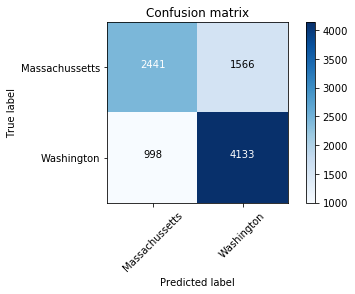

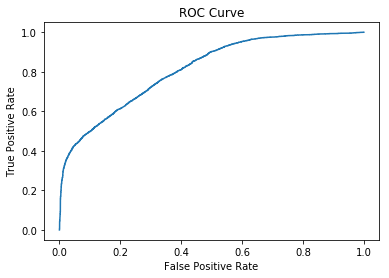

In [80]:
LogisticRegressionClassifier = LogisticRegression()
LogisticRegressionClassifier.fit(x_train,y_train)
train_predictions = LogisticRegressionClassifier.predict(x_train)
test_predictions = LogisticRegressionClassifier.predict(x_test)

print_metrics(y_test,test_predictions)
plot_confusion_matrix(confusion_matrix(y_test,test_predictions))
roc_plotter(LogisticRegressionClassifier,x_test,y_test,clfType="LogisticRegression")

Accuracy: 0.715364412344
Precision: 0.680559520411
Recall: 0.929253556812
F-1 Score: 0.785696630139


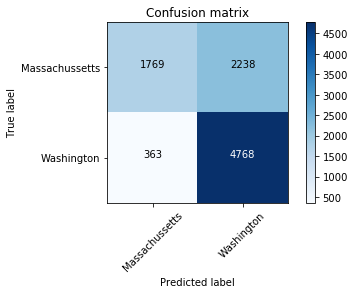

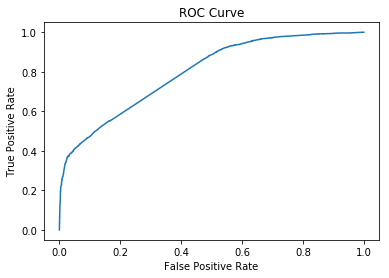

In [81]:
rfc = RandomForestClassifier(max_depth=30)
rfc.fit(x_train,y_train)
train_predictions = rfc.predict(x_train)
test_predictions = rfc.predict(x_test)

print_metrics(y_test,test_predictions)
plot_confusion_matrix(confusion_matrix(y_test,test_predictions))
roc_plotter(rfc,x_test,y_test,clfType="RandomForest")

Accuracy: 0.621689647625
Precision: 0.738461538462
Recall: 0.505164685247
F-1 Score: 0.599930563592


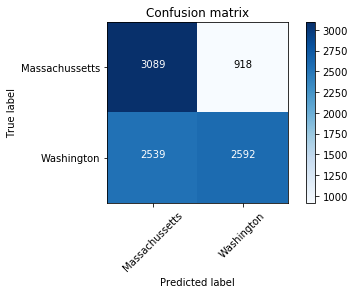

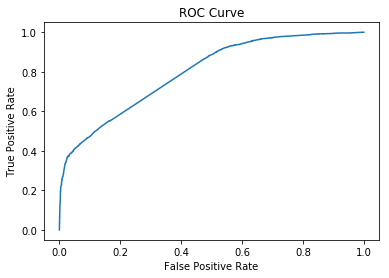

In [82]:
nb = GaussianNB()
nb.fit(x_train.toarray(),y_train)
train_predictions = nb.predict(x_train.toarray())
test_predictions = nb.predict(x_test.toarray())

print_metrics(y_test,test_predictions)
plot_confusion_matrix(confusion_matrix(y_test,test_predictions))
roc_plotter(rfc,x_test,y_test,clfType="NaiveBayes")

In [ ]:
# QUESTION 16: The dataset in hands is rich as there is a lot of metadata to each tweet. Be
# creative and propose a new problem (something interesting that can be inferred from this dataset)
# other than the previous parts. You can look into the literature of Twitter data analysis to get some
# ideas. Implement your idea and show that it works. As a suggestion, you might provide some
# analysis based on changes of tweet sentiments for fans of the opponent teams participating in the
# match. You get full credit for briniging in novelty and full or partial implementation of your new
# ideas.